# Airline Passengers Satisfaction

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

# Loading The Data

## Reading Dataset

In [2]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore");

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data.shape

(103904, 25)

In [5]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Understanding the Data

## Checking Data Types

In [6]:
print(data.dtypes.value_counts())
print('**********')

int64      19
object      5
float64     1
dtype: int64
**********


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

# Data Preprocessing

## Handling The Missing Data

In [8]:
data.columns[data.isnull().any()]

Index(['Arrival Delay in Minutes'], dtype='object')

In [12]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(8,6)})

In [40]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

<AxesSubplot: >

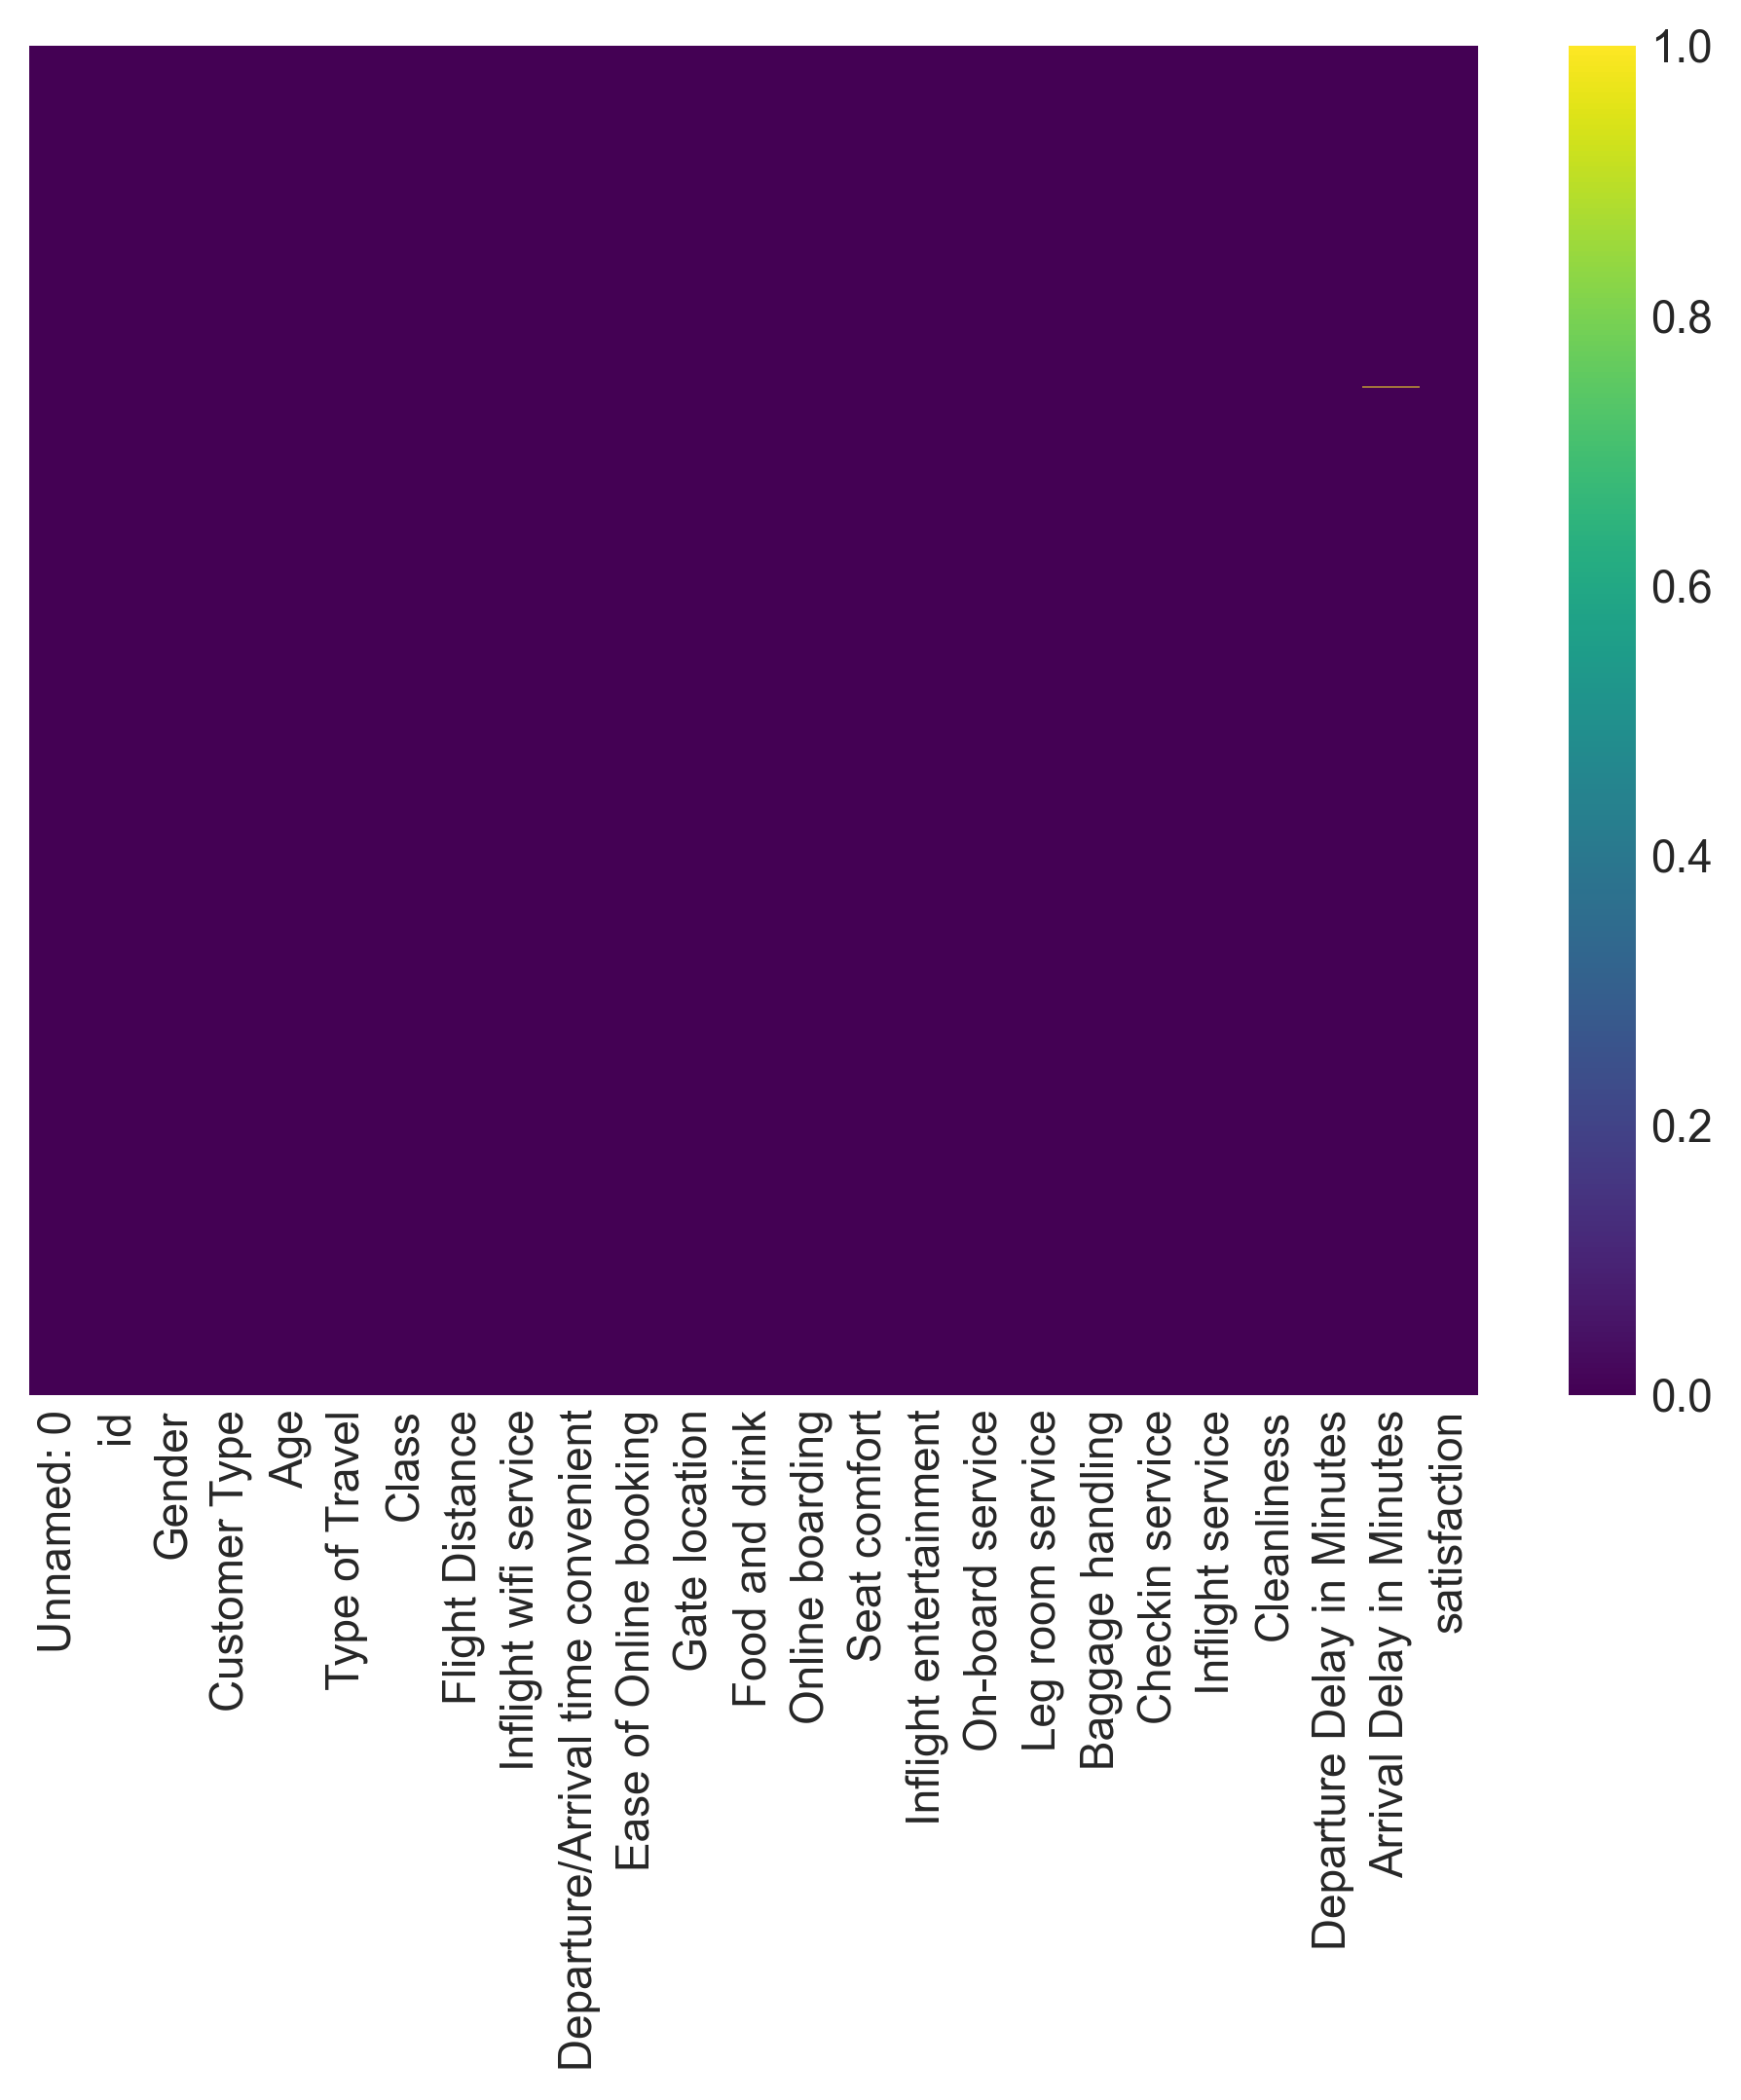

In [14]:
import seaborn as sns
sns.heatmap(data.isnull(), yticklabels=False, cmap="viridis")

At first i was going to drop those rows, but since the missing values of Arrival Delay in Minutes column are too small, i decided just to predict the missing values with mean function.

In [16]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean(axis = 0), inplace = True)

## Handling the columns

The first features are useless and will not affect the classification, so I get rid of it.

In [17]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [18]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Lets see the correlation between the columns

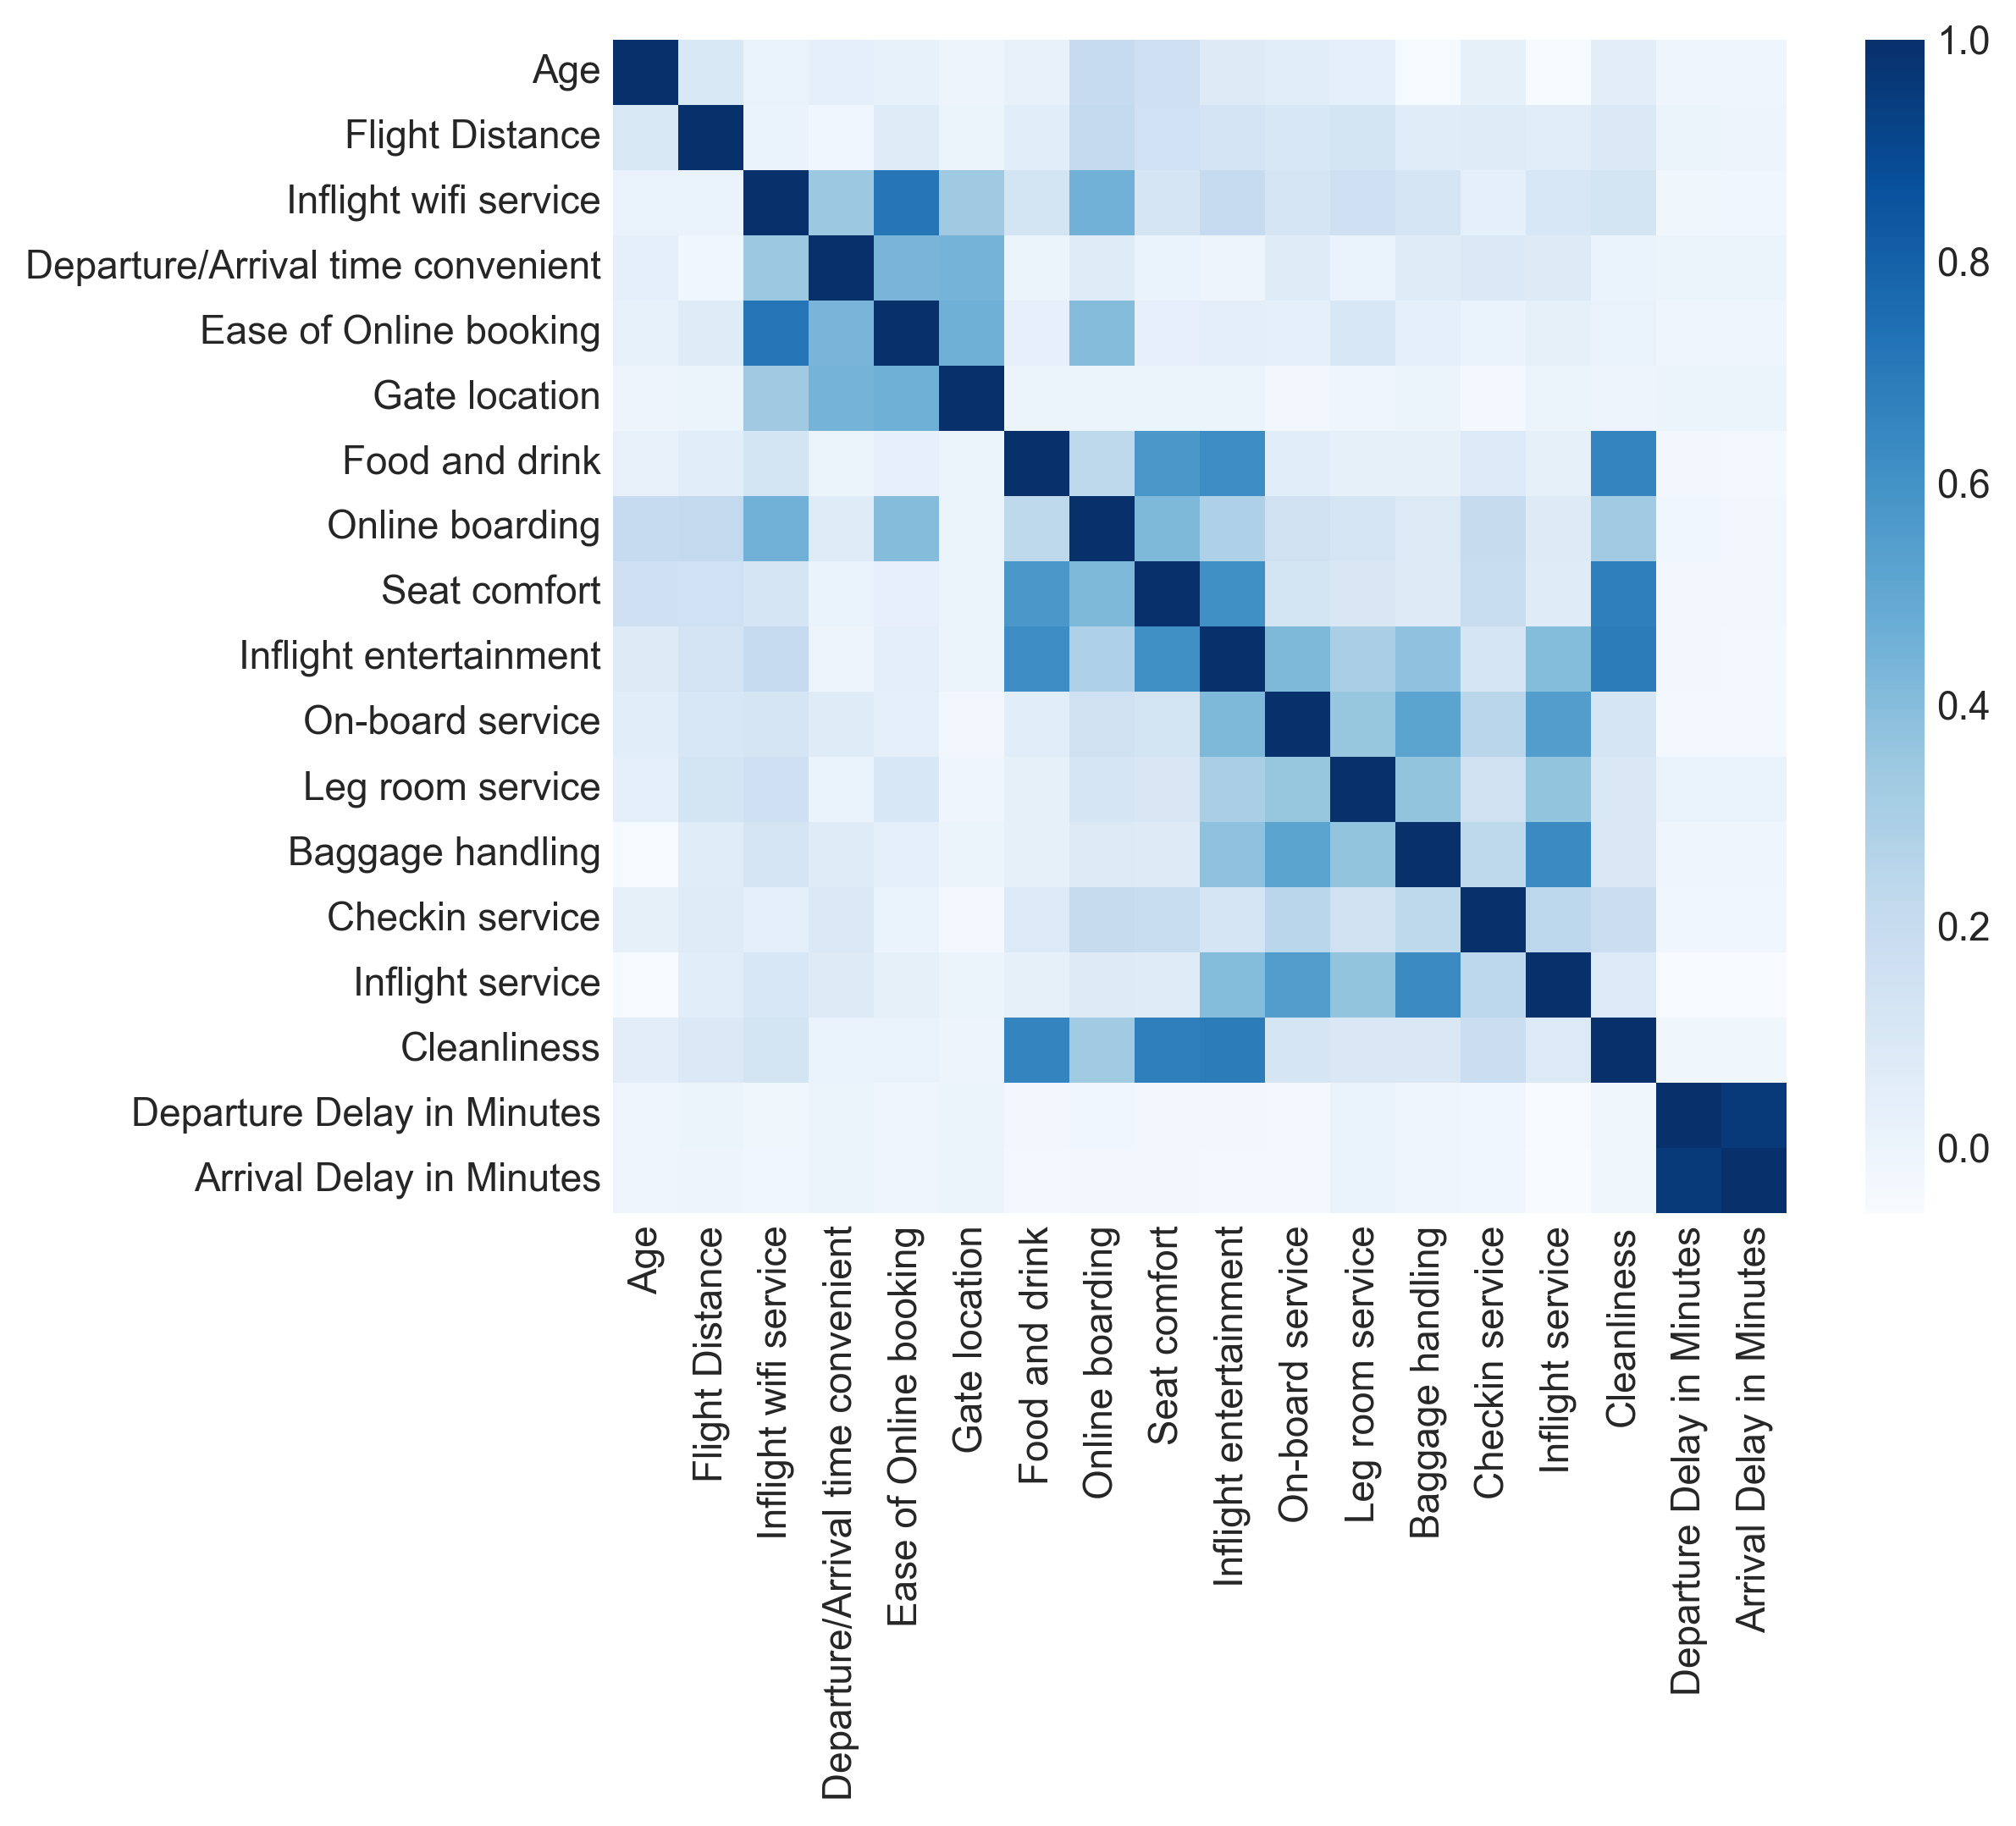

In [19]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

In the table above, we see that there is a strong correlation between the "Departure Delay in Minutes" and "Arrival Delay in Minutes" columns. Logically, it is normal to observe such a correlation since when the plane takes off late, it will also arrive late at its destination. Therefore, by deleting the "Arrival Delay in Minutes" column, we can reach the correct result without repeating the same data.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [22]:
data = data.drop(data.iloc[:,[21]], axis = 1)

In [57]:
# categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
# data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

Text(0.5, 1.0, 'Heatmap for numerical columns')

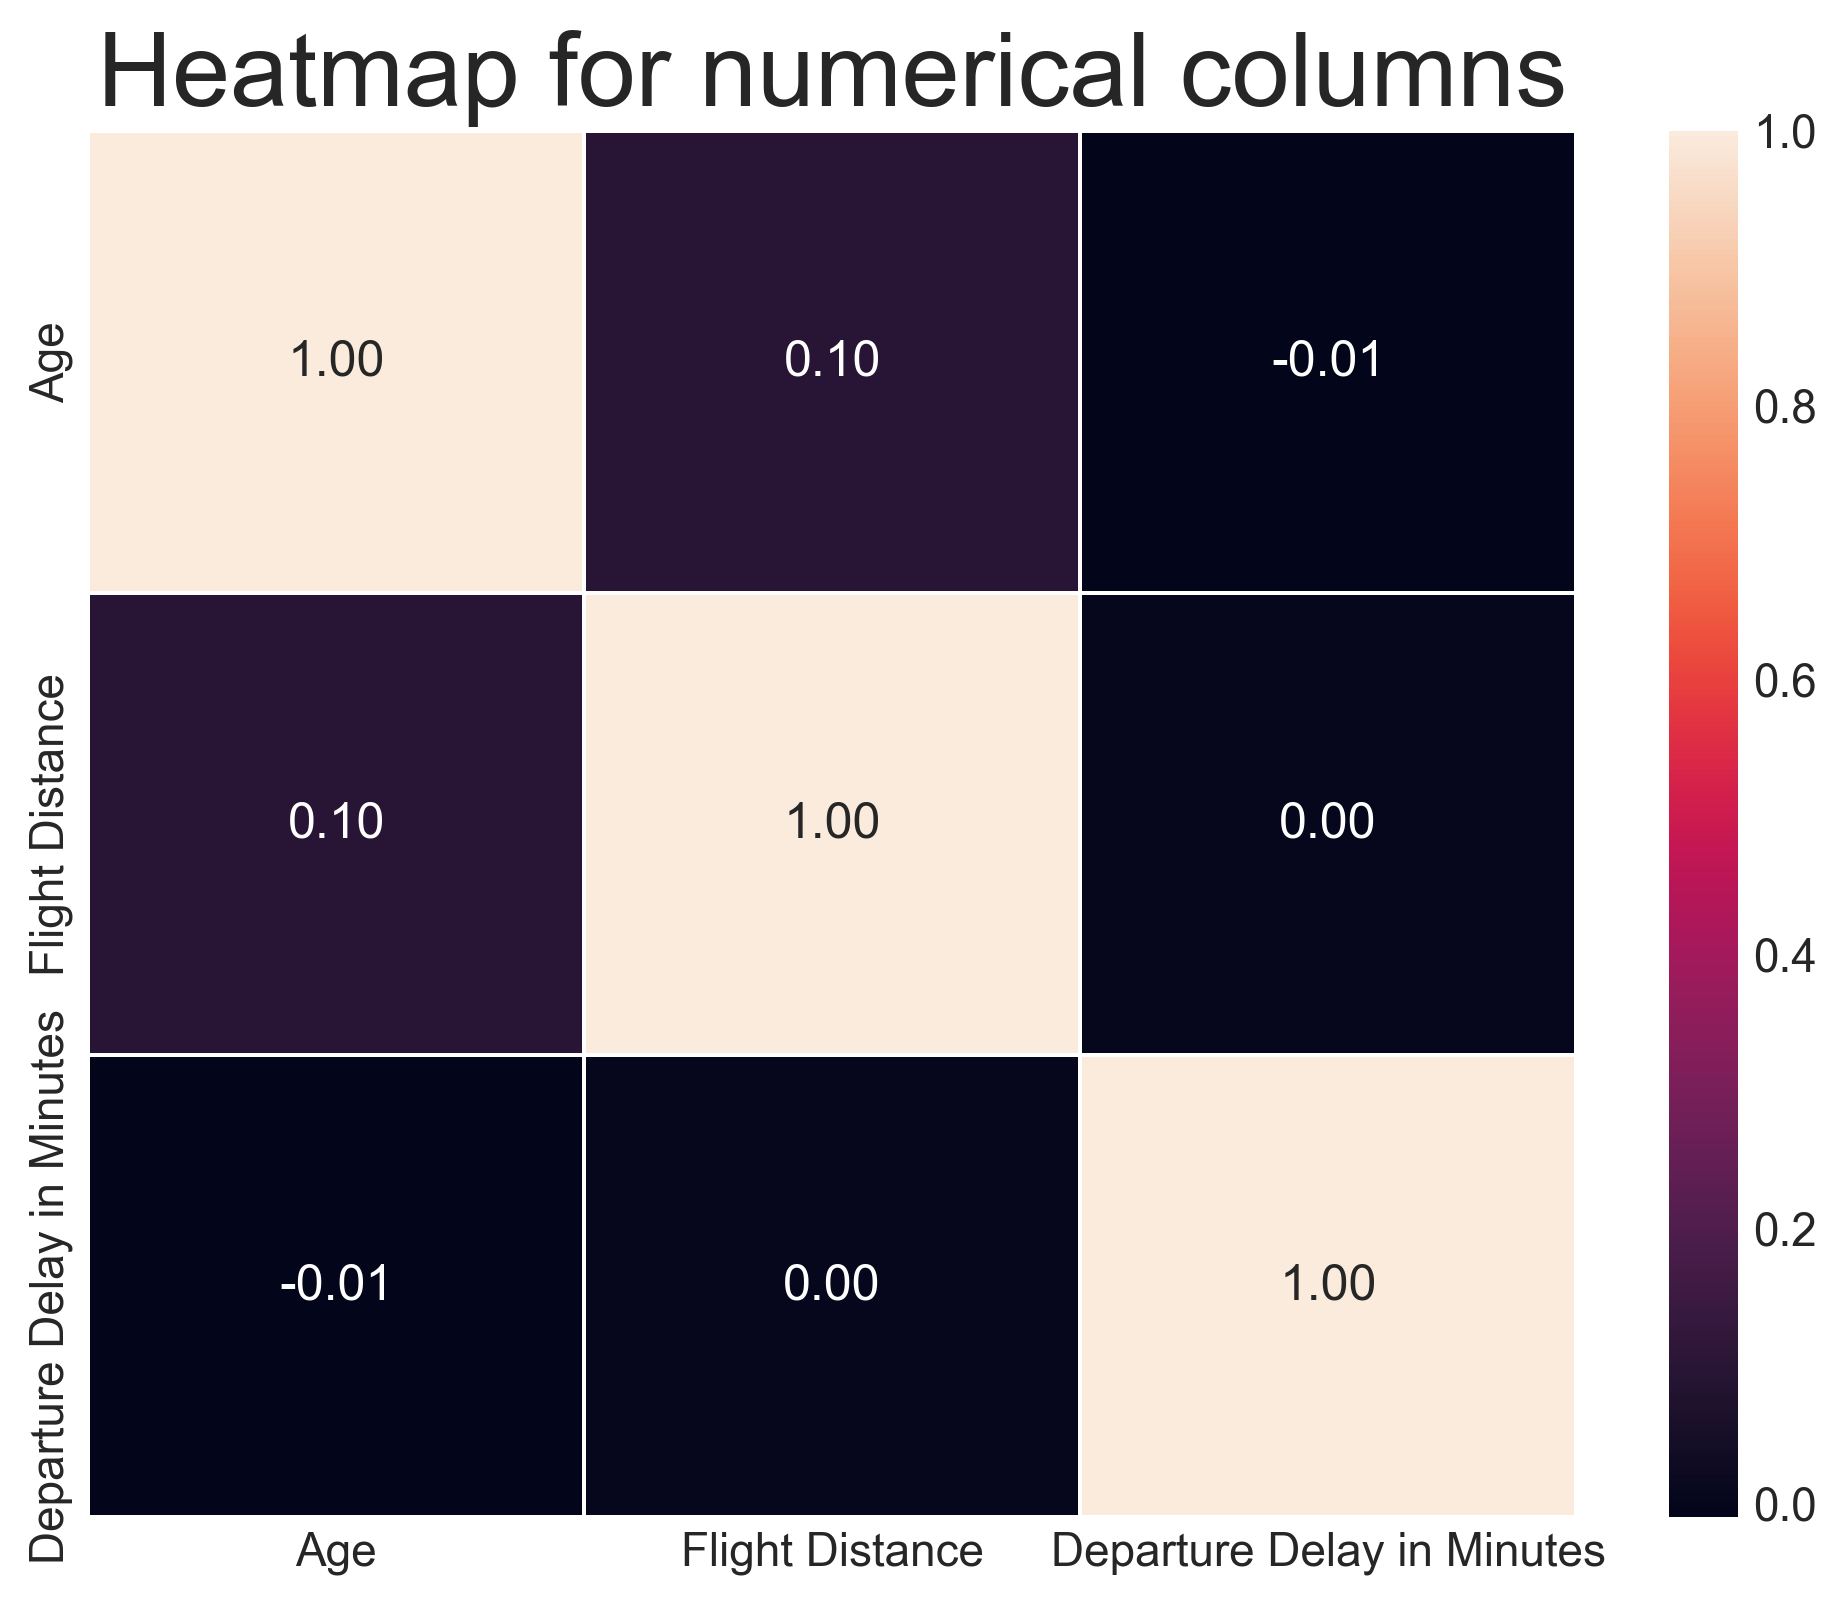

In [60]:
sns.heatmap(data.corr(), annot = True, linewidths=.5, fmt=".2f")
plt.title("Heatmap for numerical columns", size=25)

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [27]:
data['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

# Data Visualization

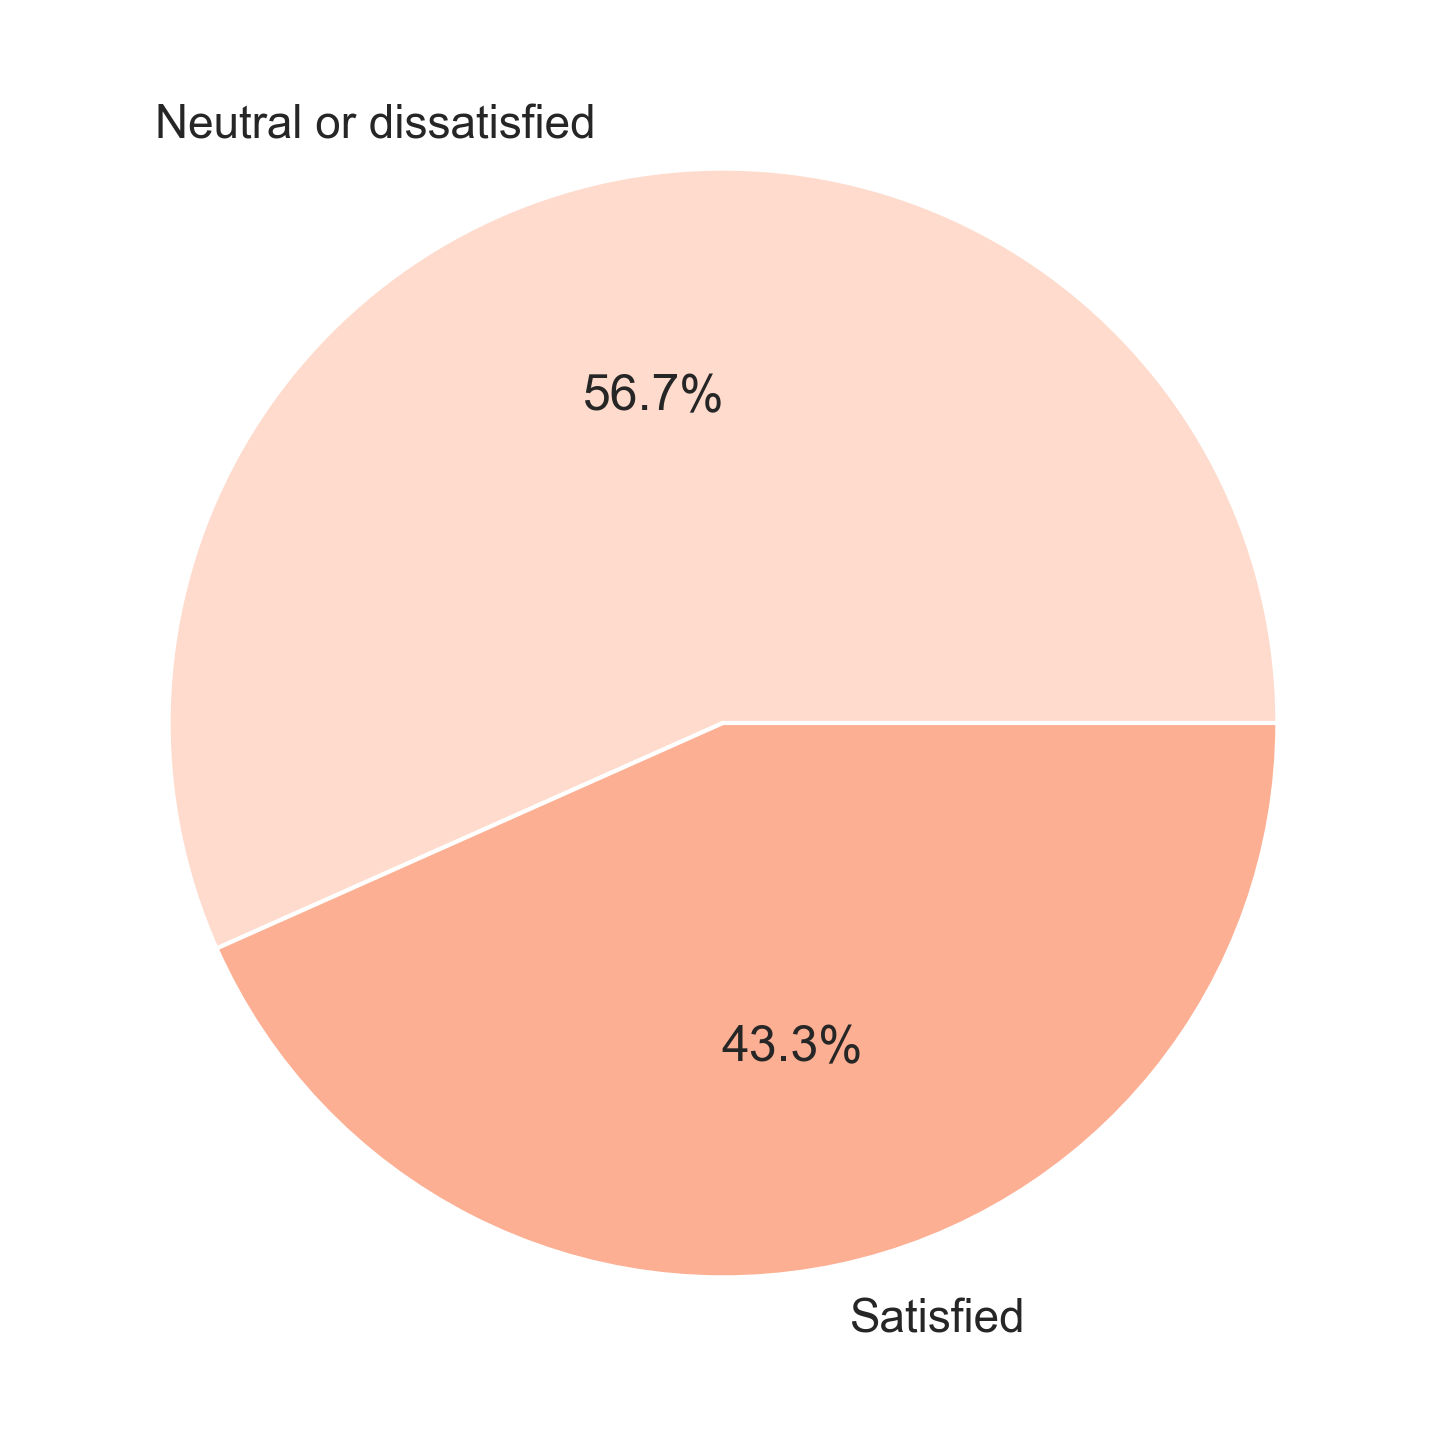

In [28]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], 
        colors = sns.color_palette("Reds"), autopct = '%1.1f%%')
pass

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
 10  Food and drink                     103904 non-null  int64 
 11  Online boarding                    103904 non-null  

In [ ]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

In [25]:
numeric_df = data.select_dtypes(['float', 'int'])
categorical_df = data.select_dtypes(['object', 'category'])

In [26]:
def bar_plot(variable):
    # we get the features
    var = data[variable]
    # count number of categorical variable
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

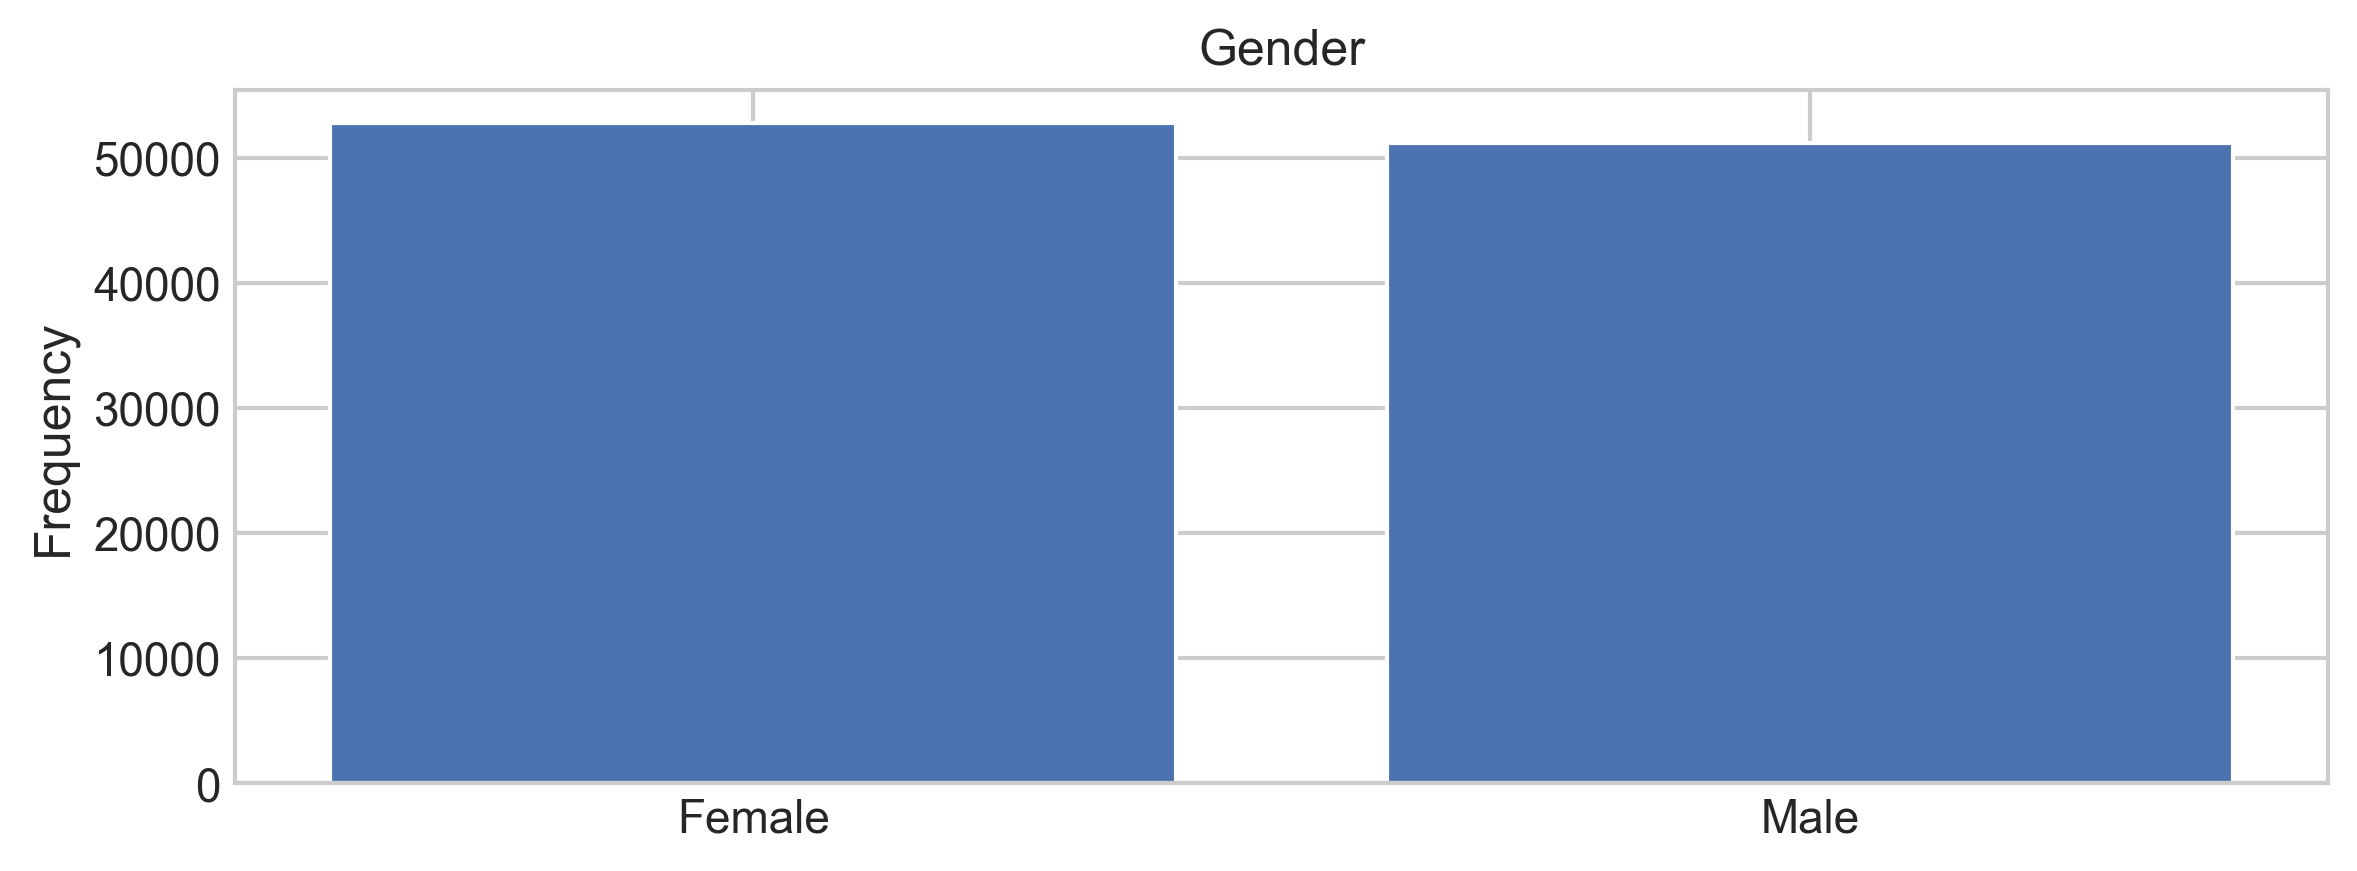

Gender: 
 Female    52727
Male      51177
Name: Gender, dtype: int64


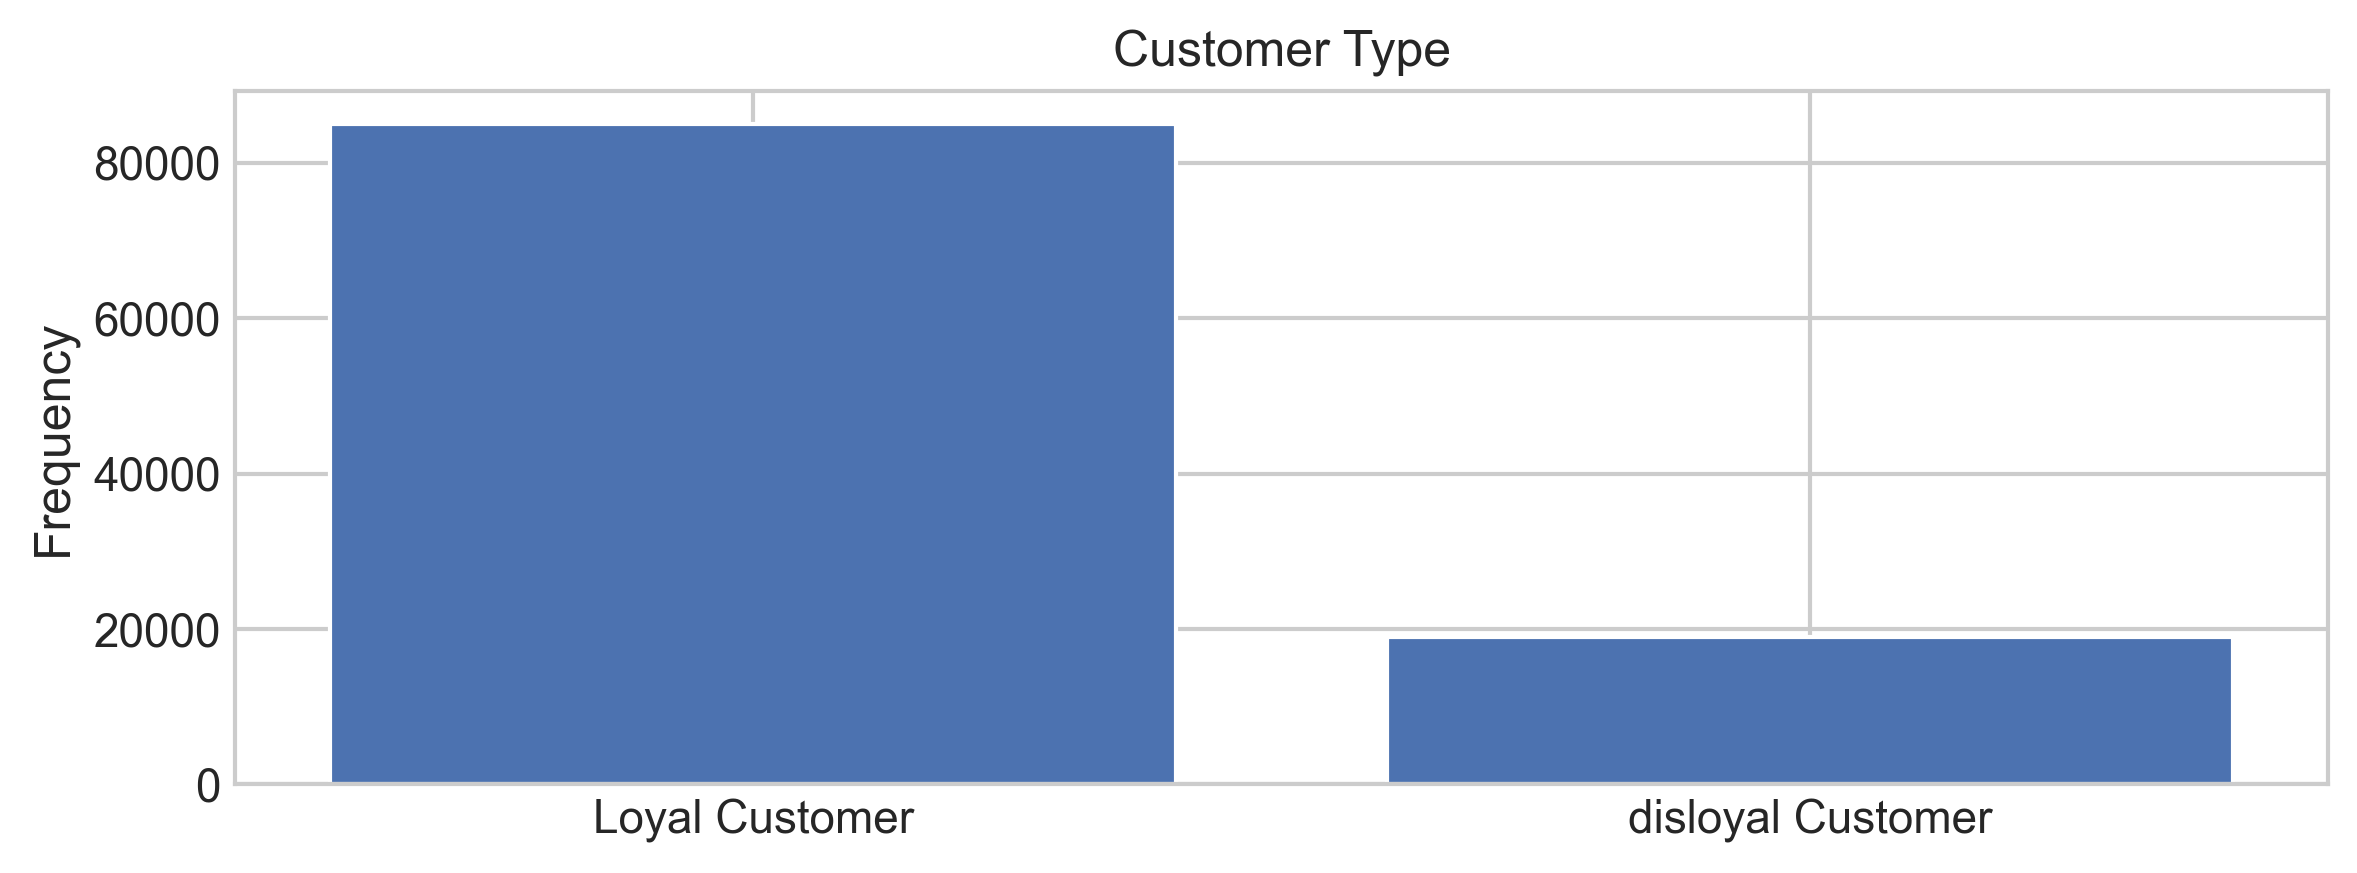

Customer Type: 
 Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64


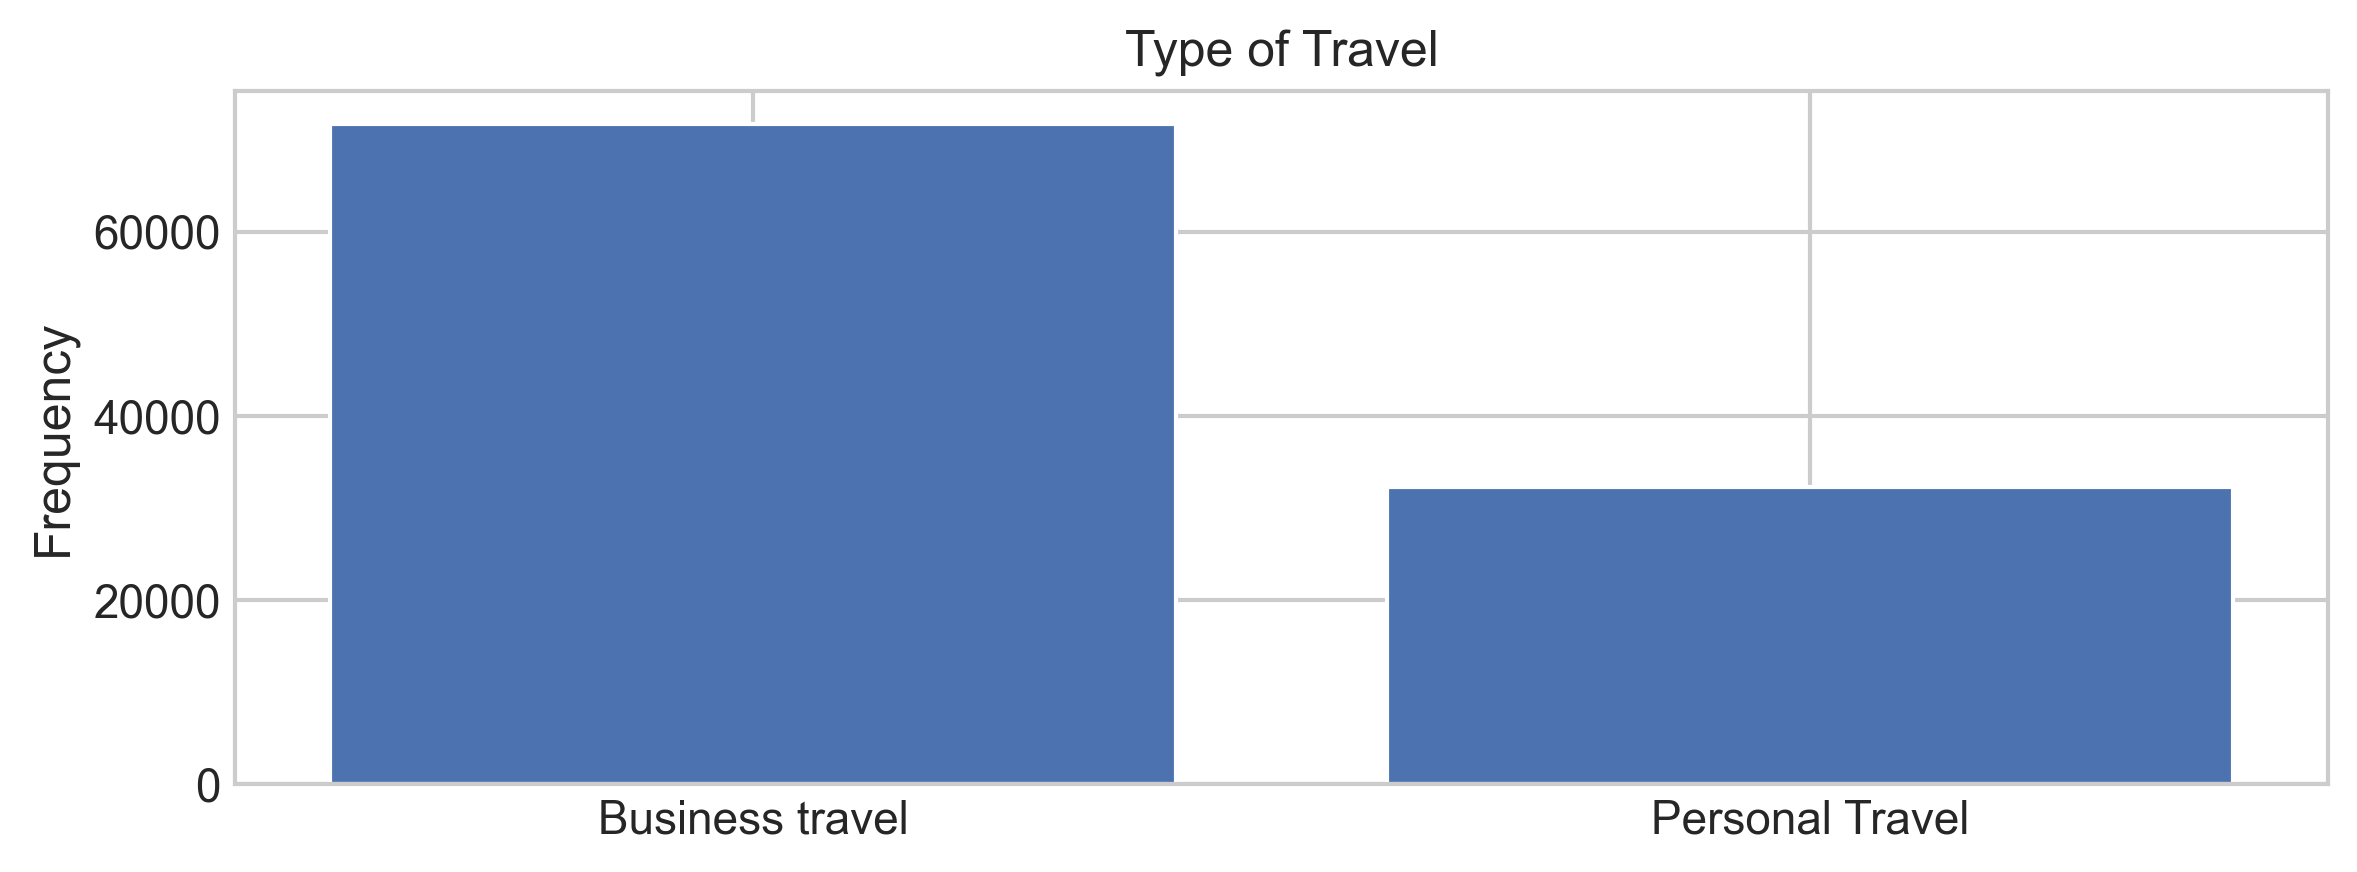

Type of Travel: 
 Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64


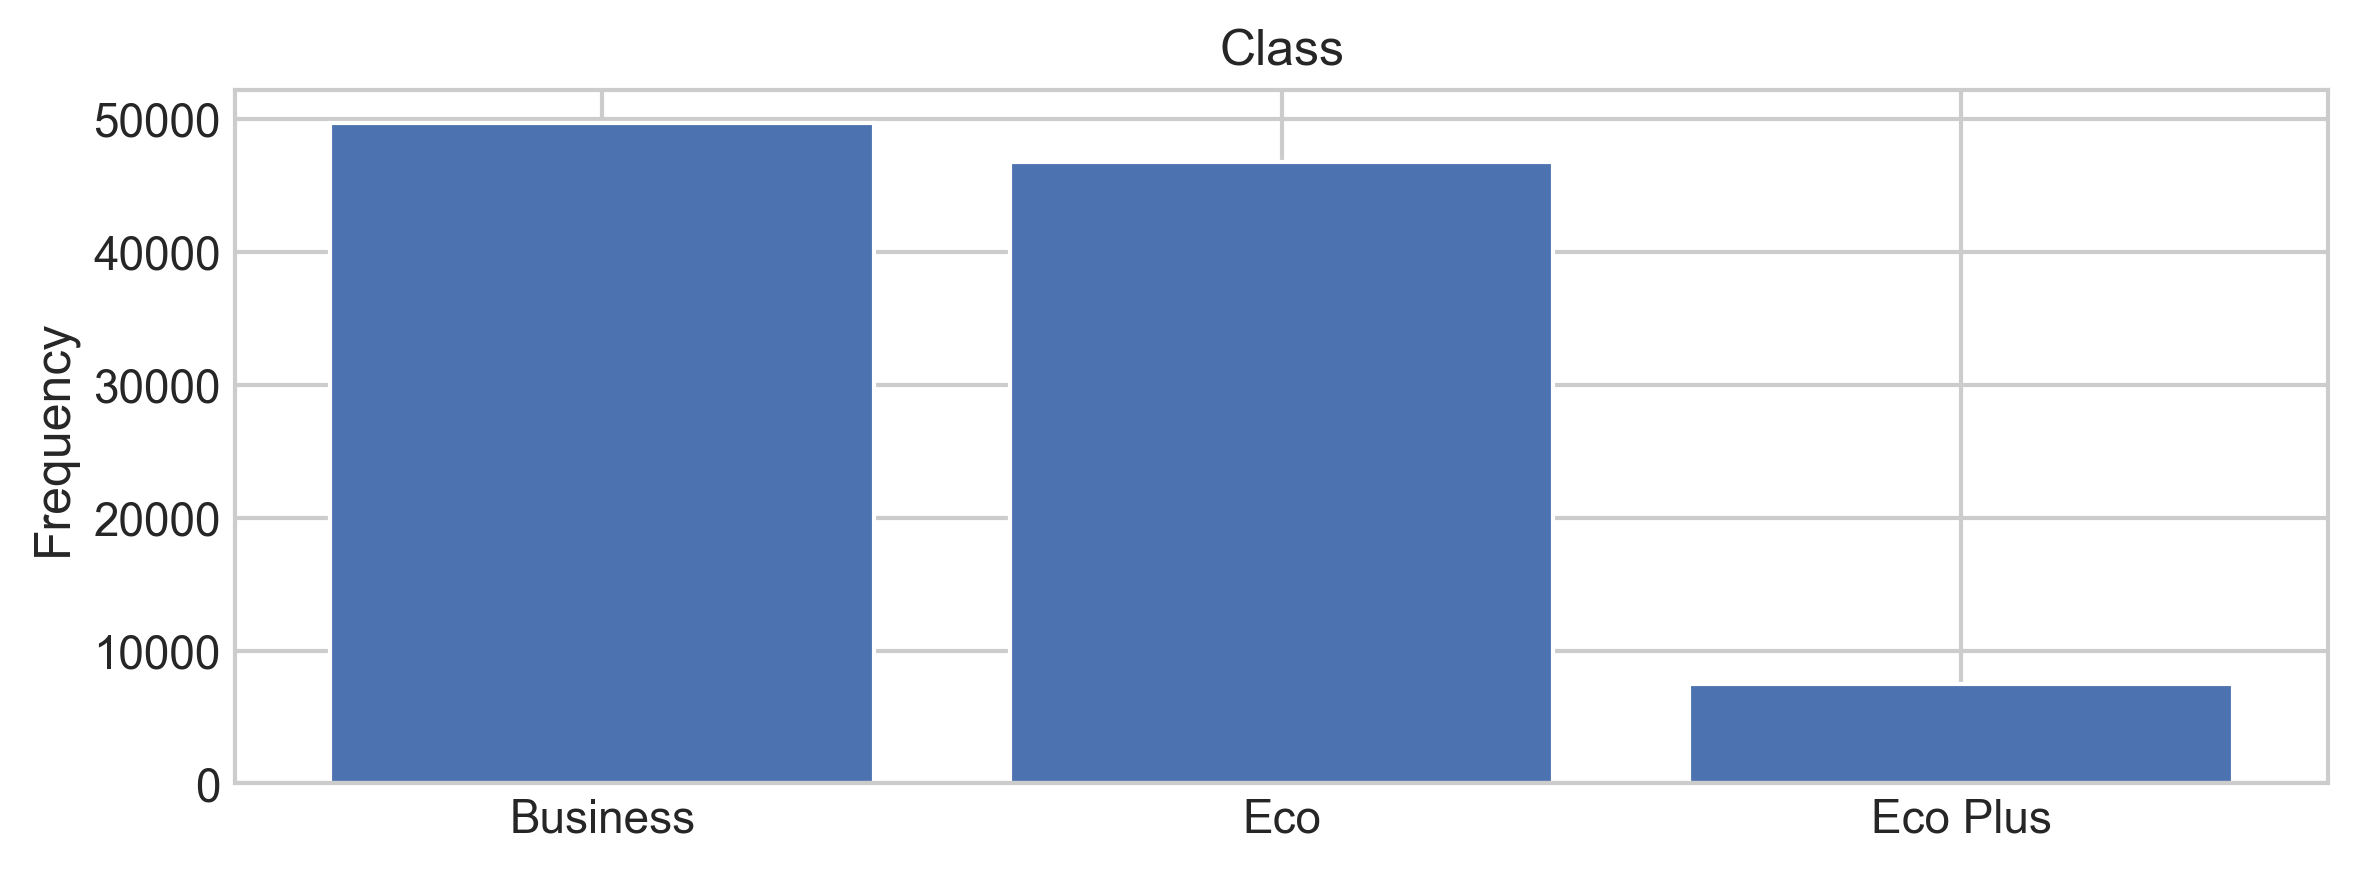

Class: 
 Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64


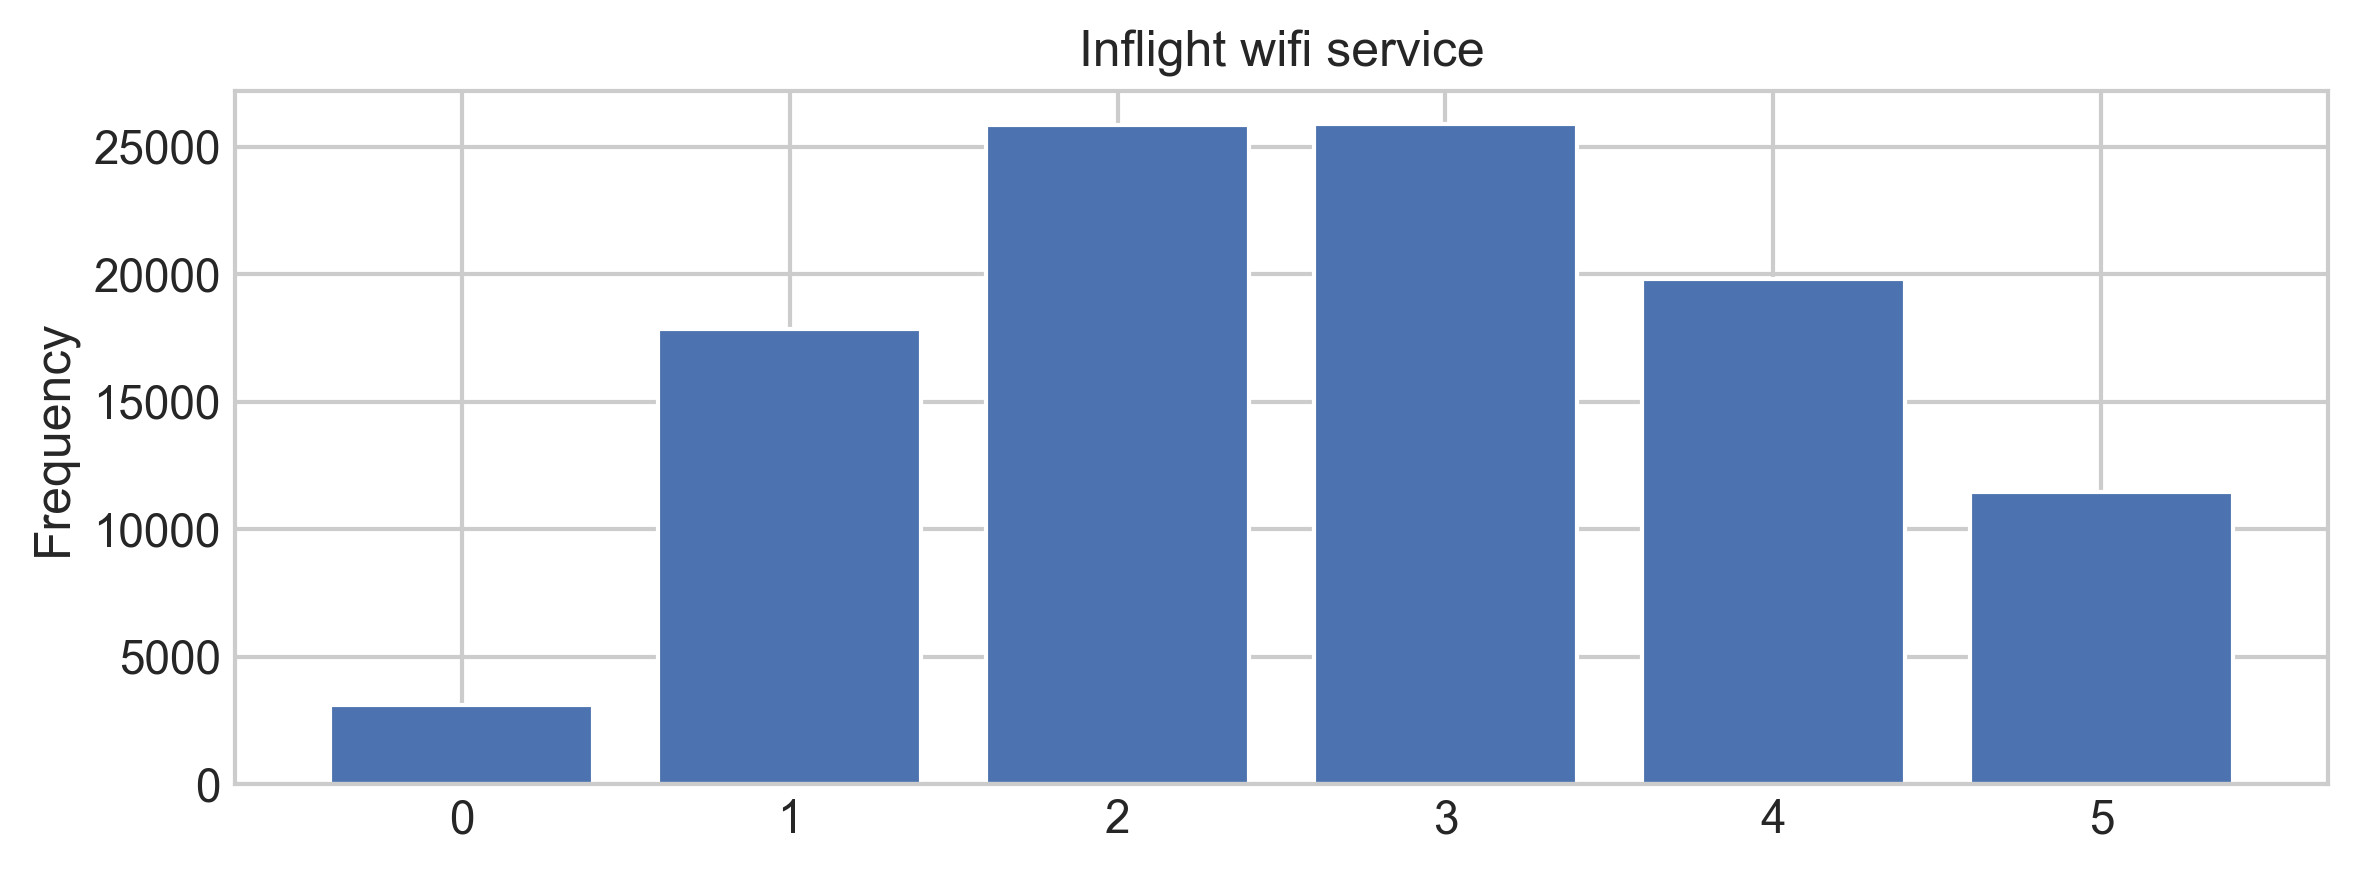

Inflight wifi service: 
 3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64


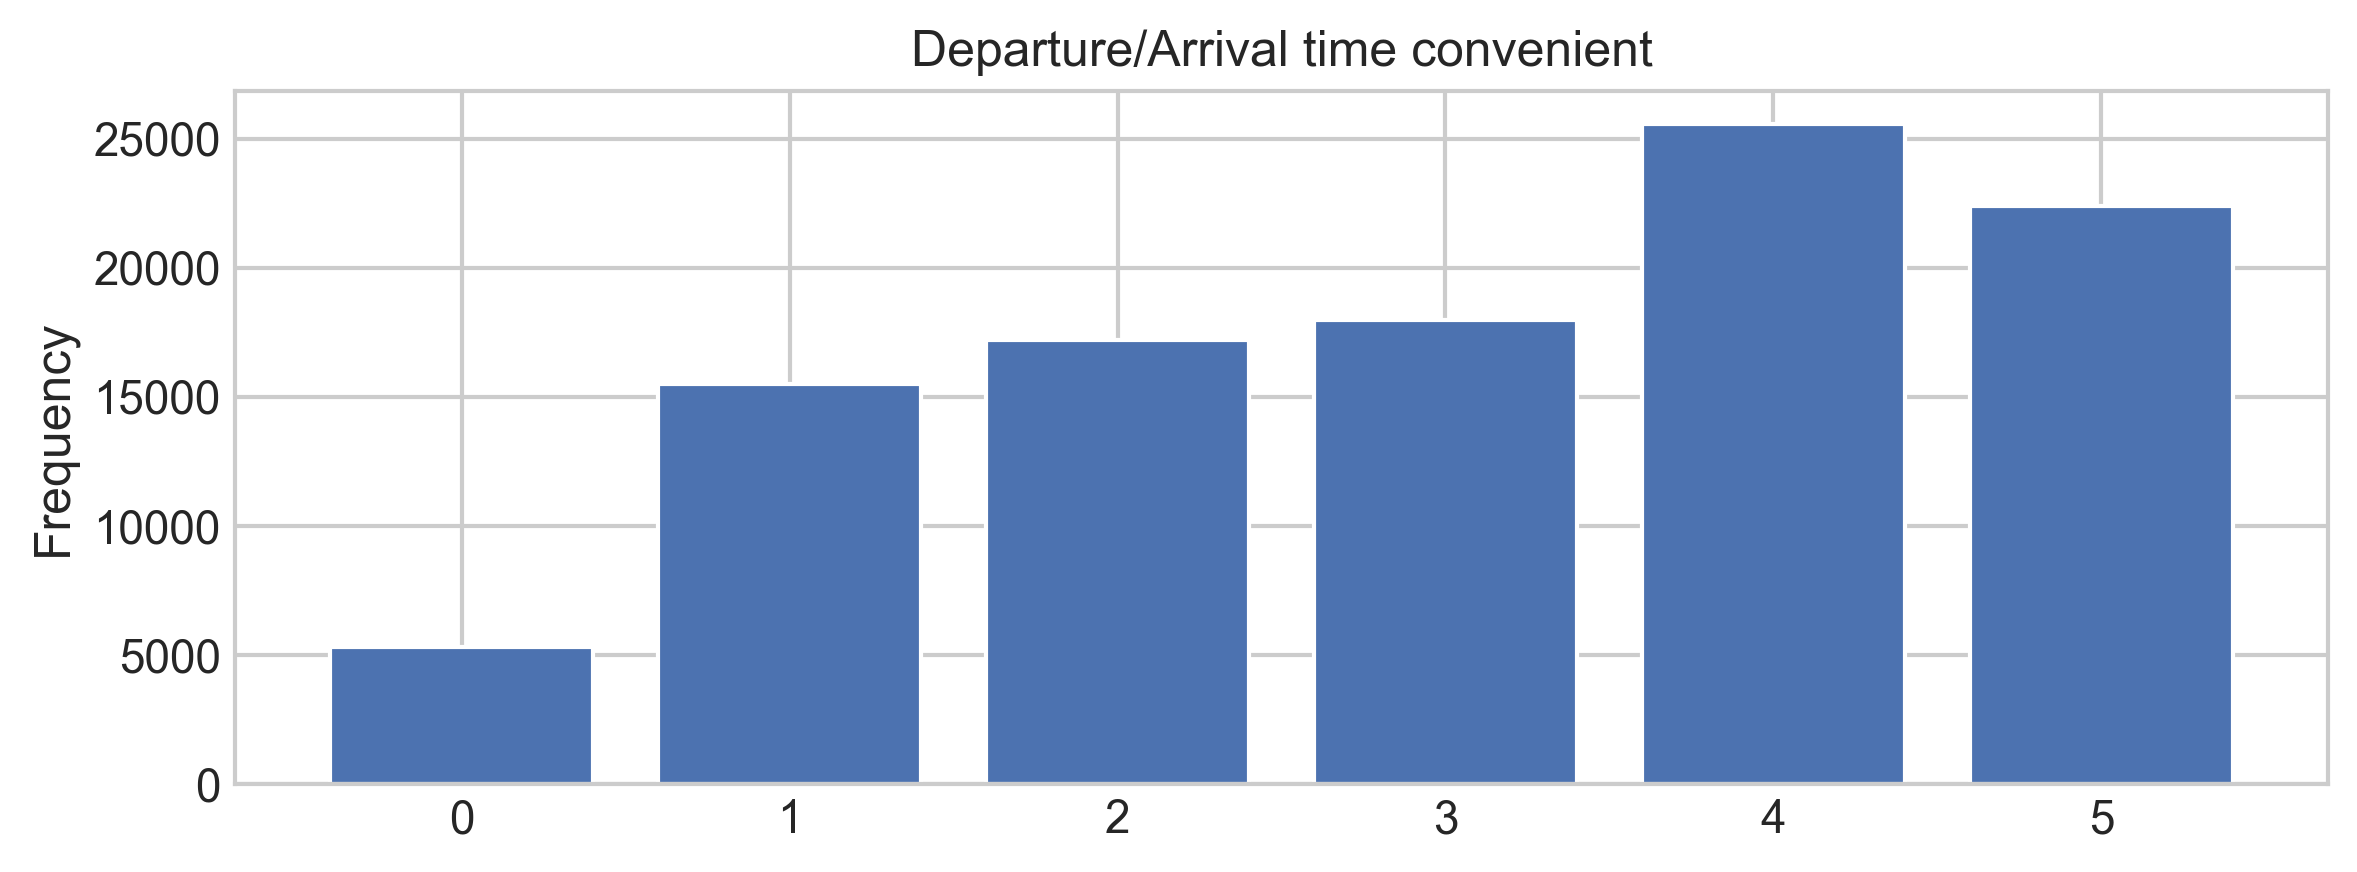

Departure/Arrival time convenient: 
 4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64


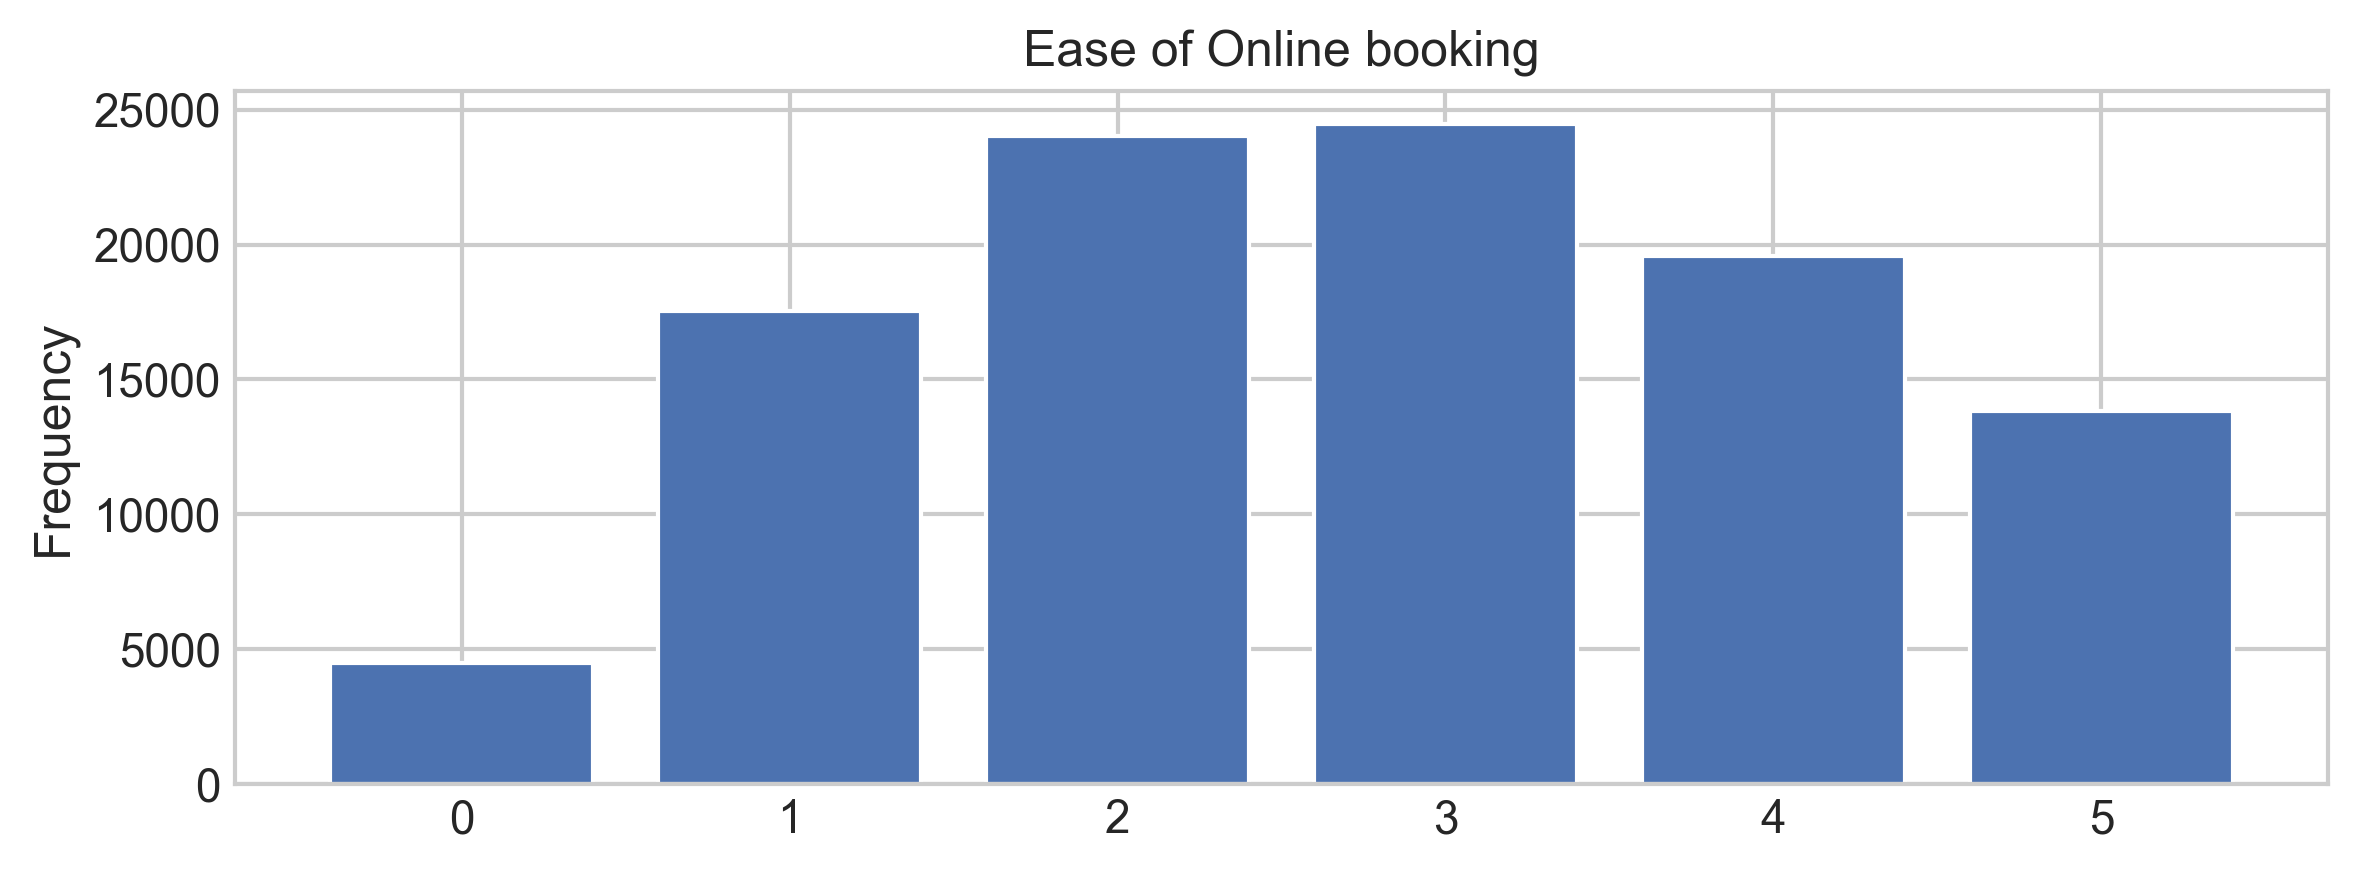

Ease of Online booking: 
 3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64


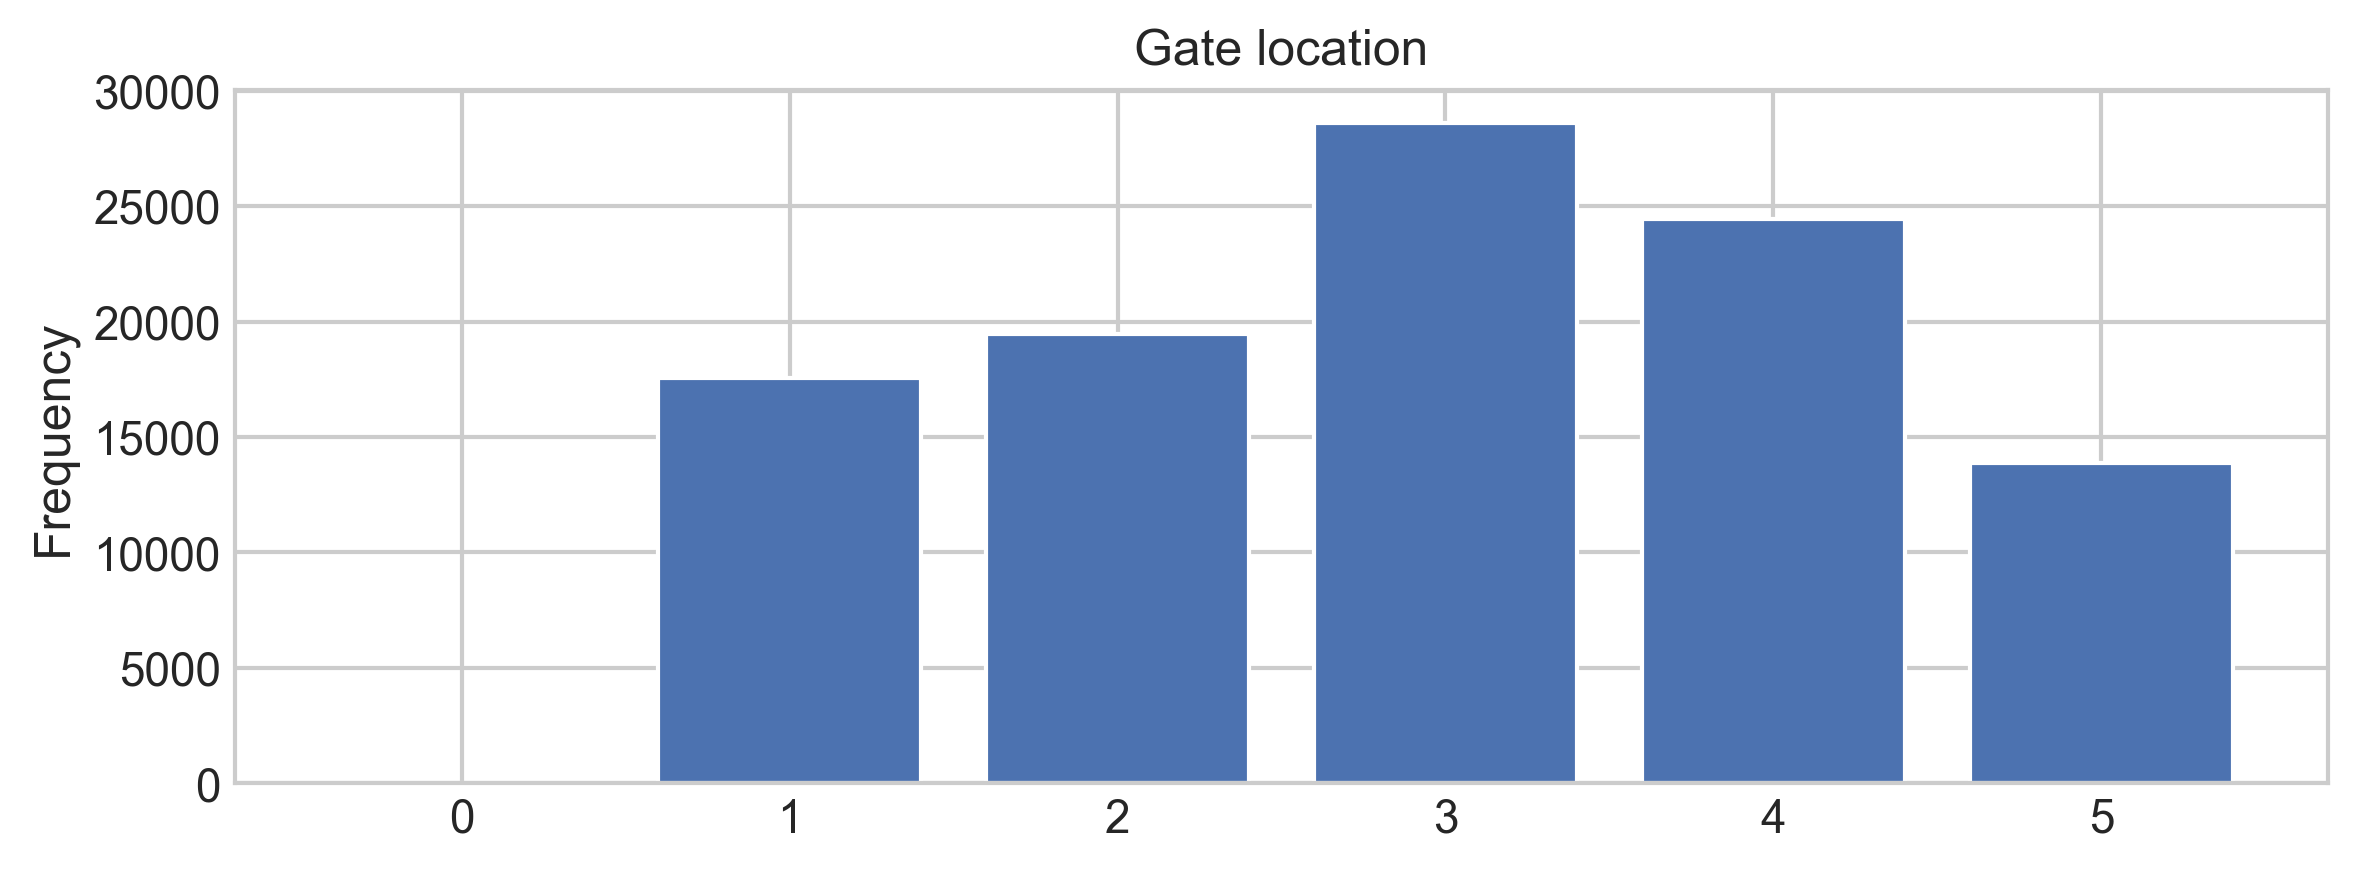

Gate location: 
 3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate location, dtype: int64


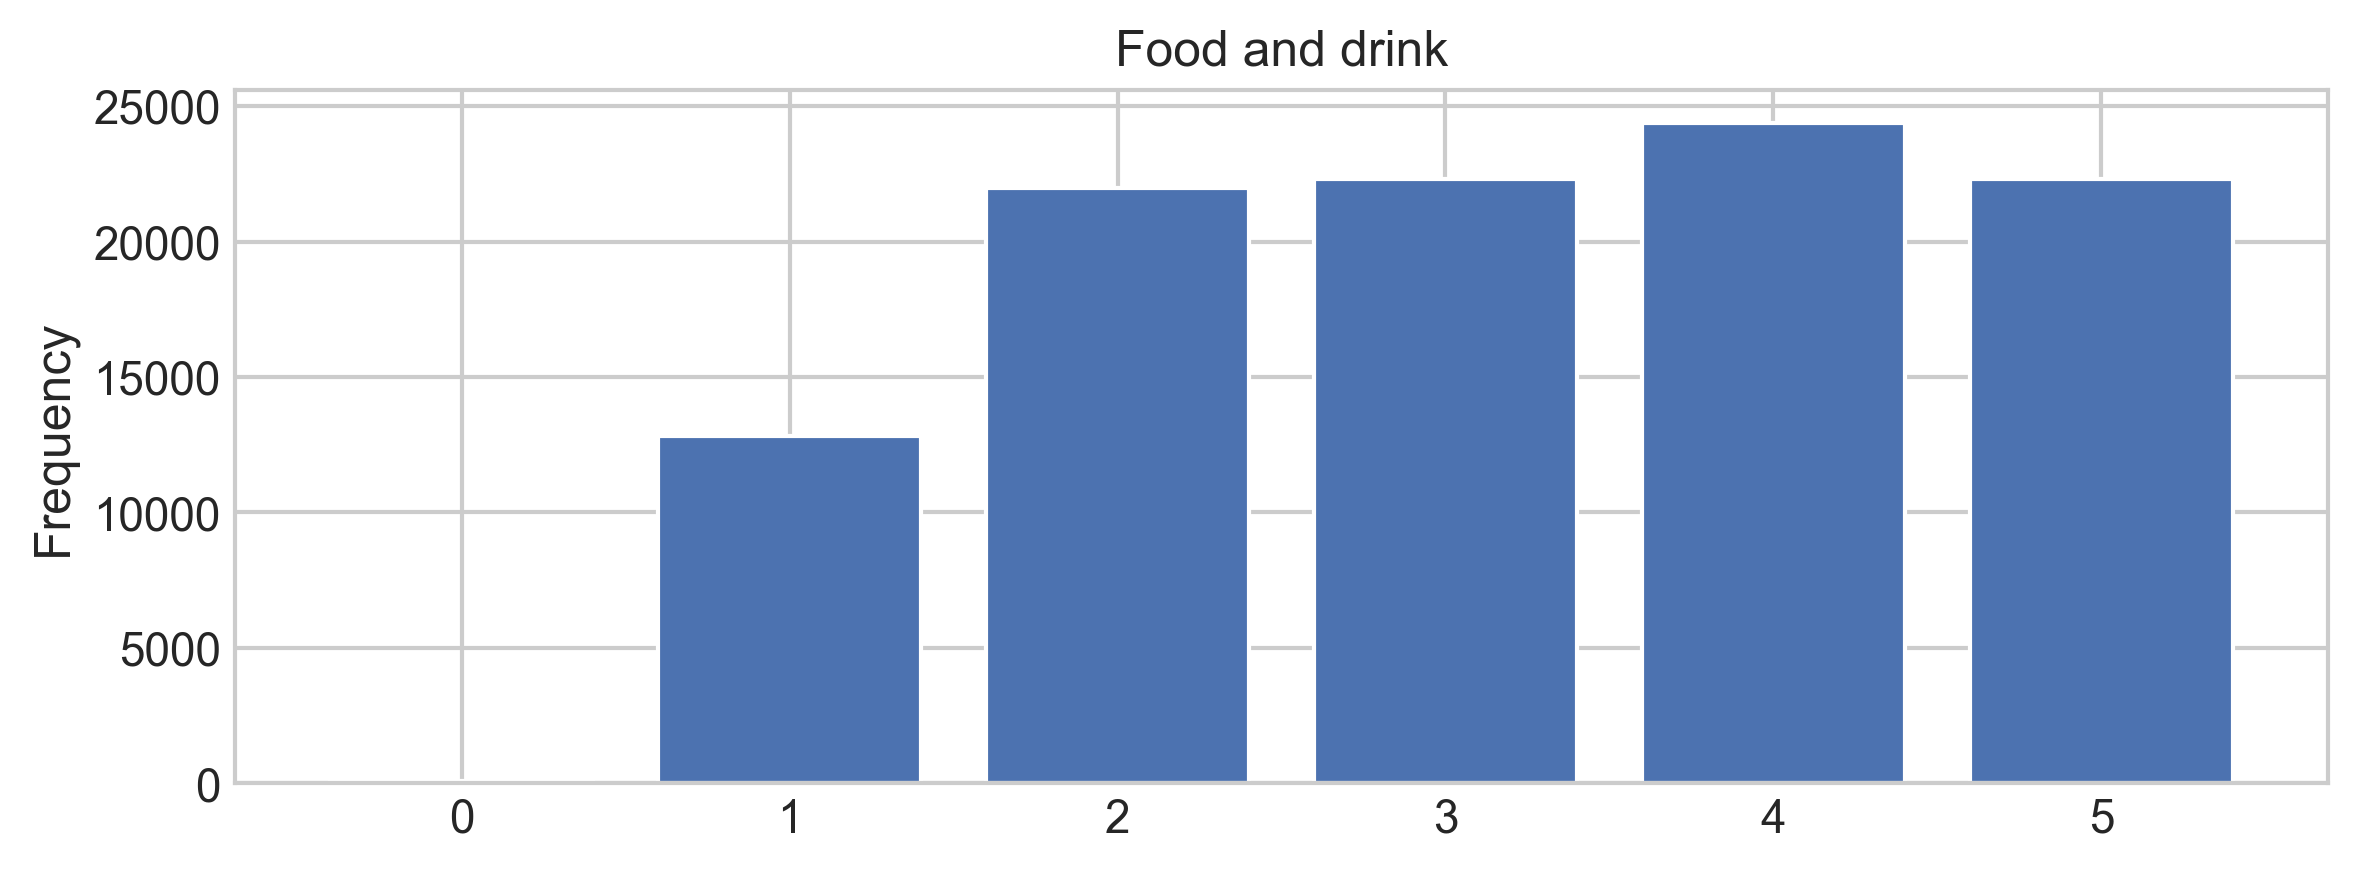

Food and drink: 
 4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64


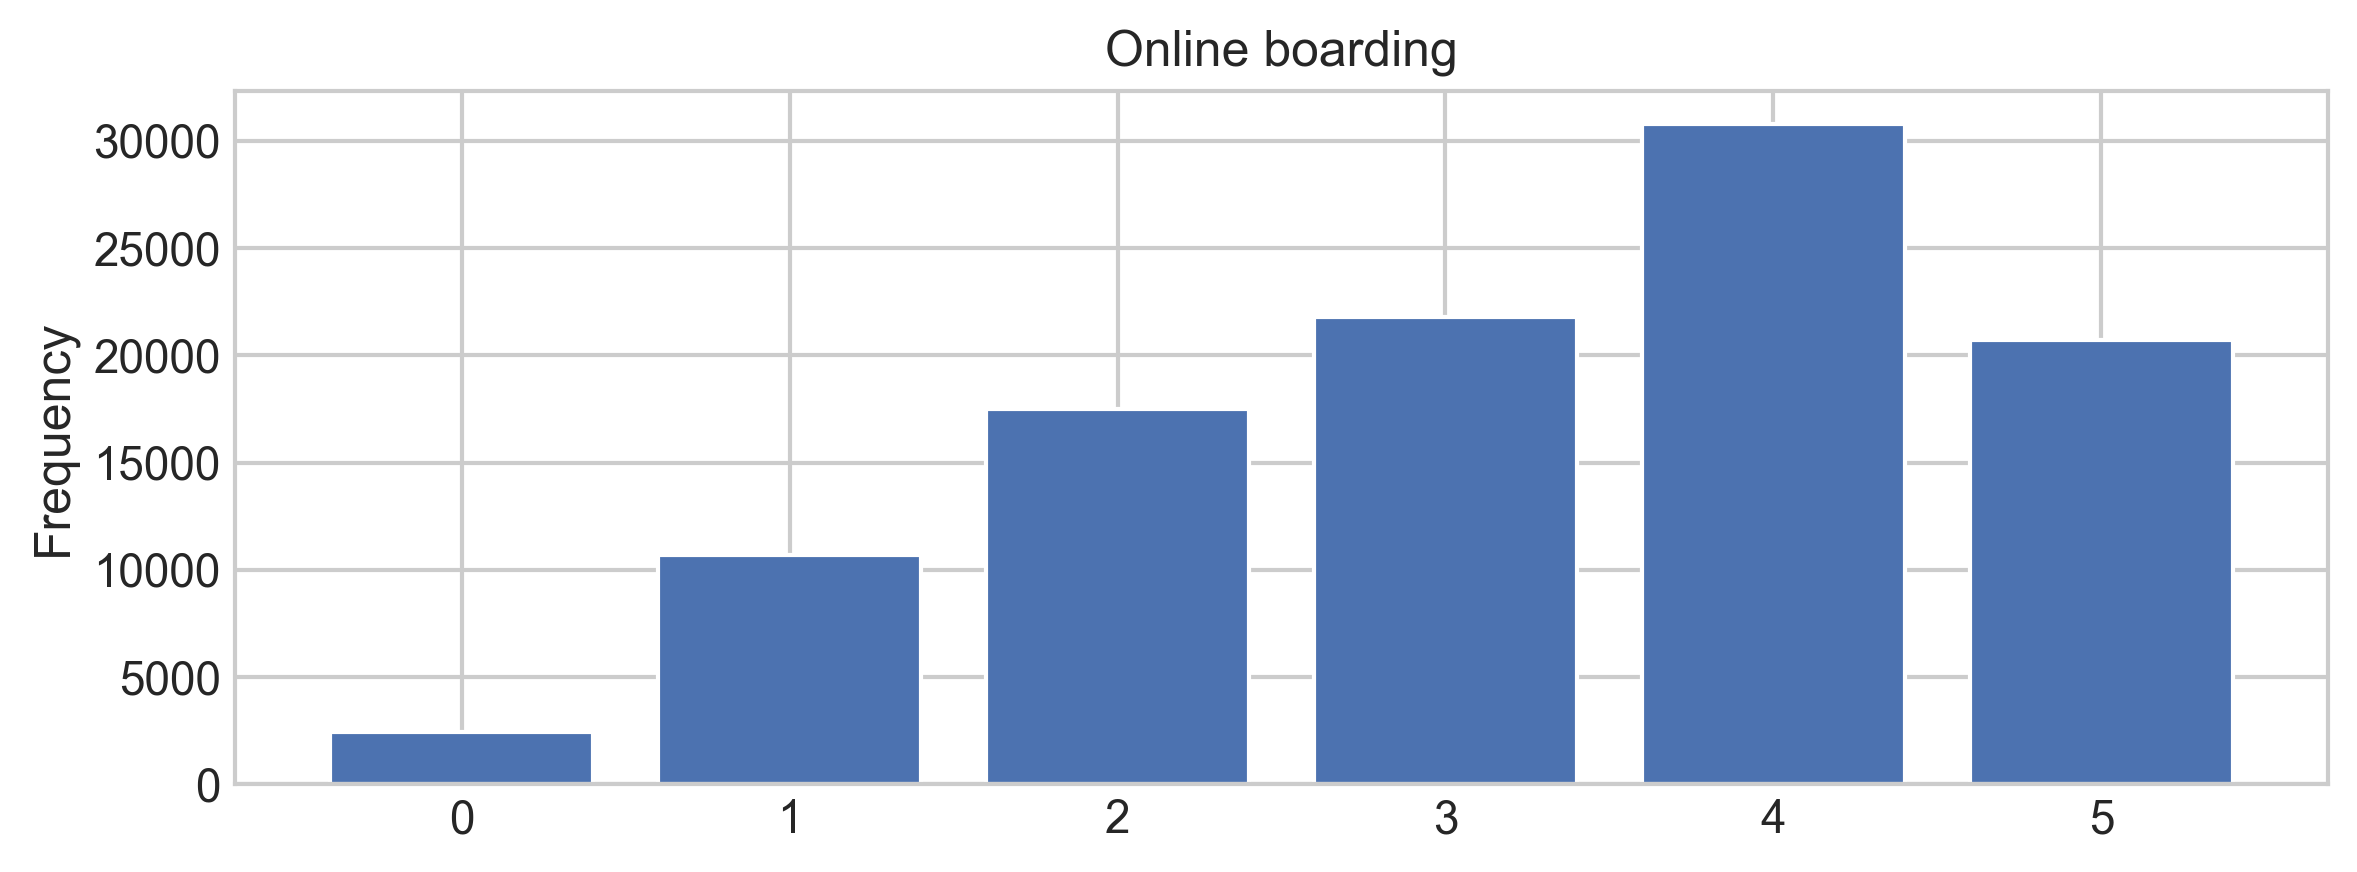

Online boarding: 
 4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64


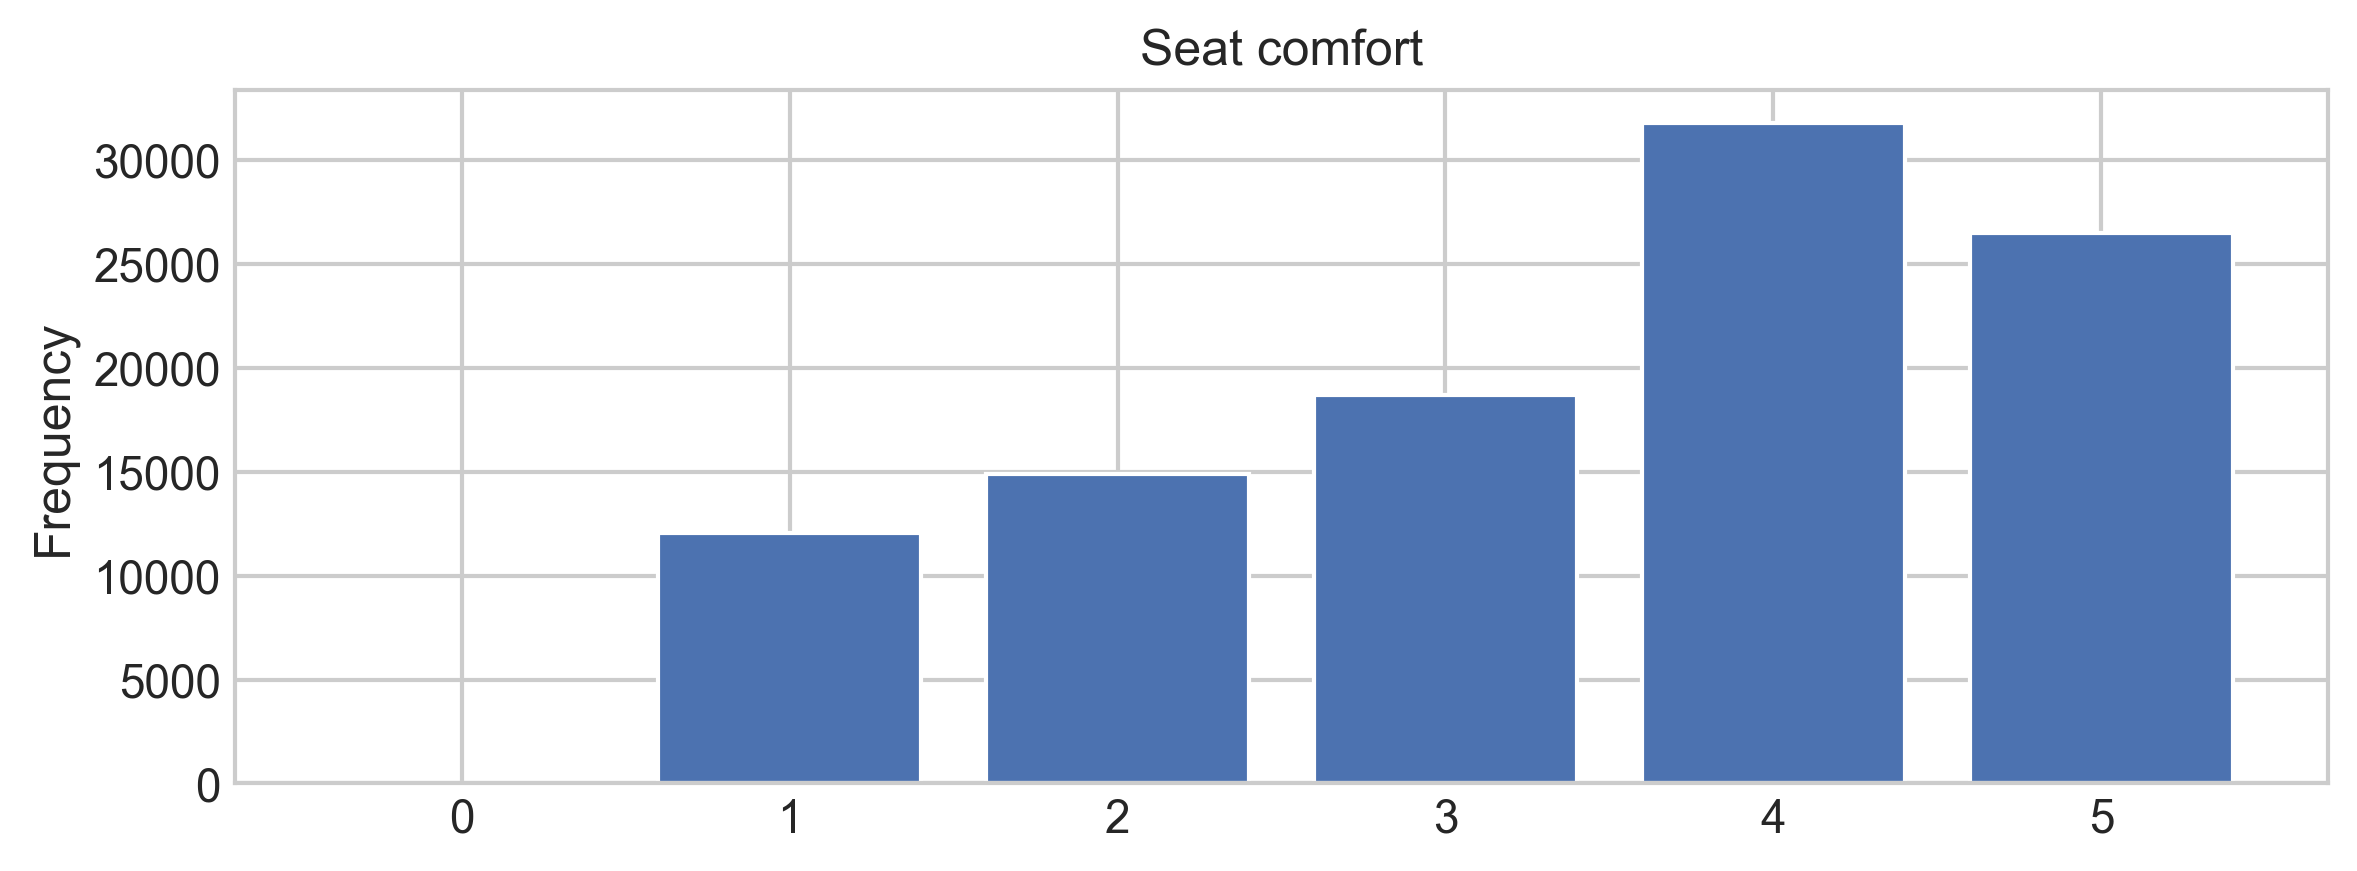

Seat comfort: 
 4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: Seat comfort, dtype: int64


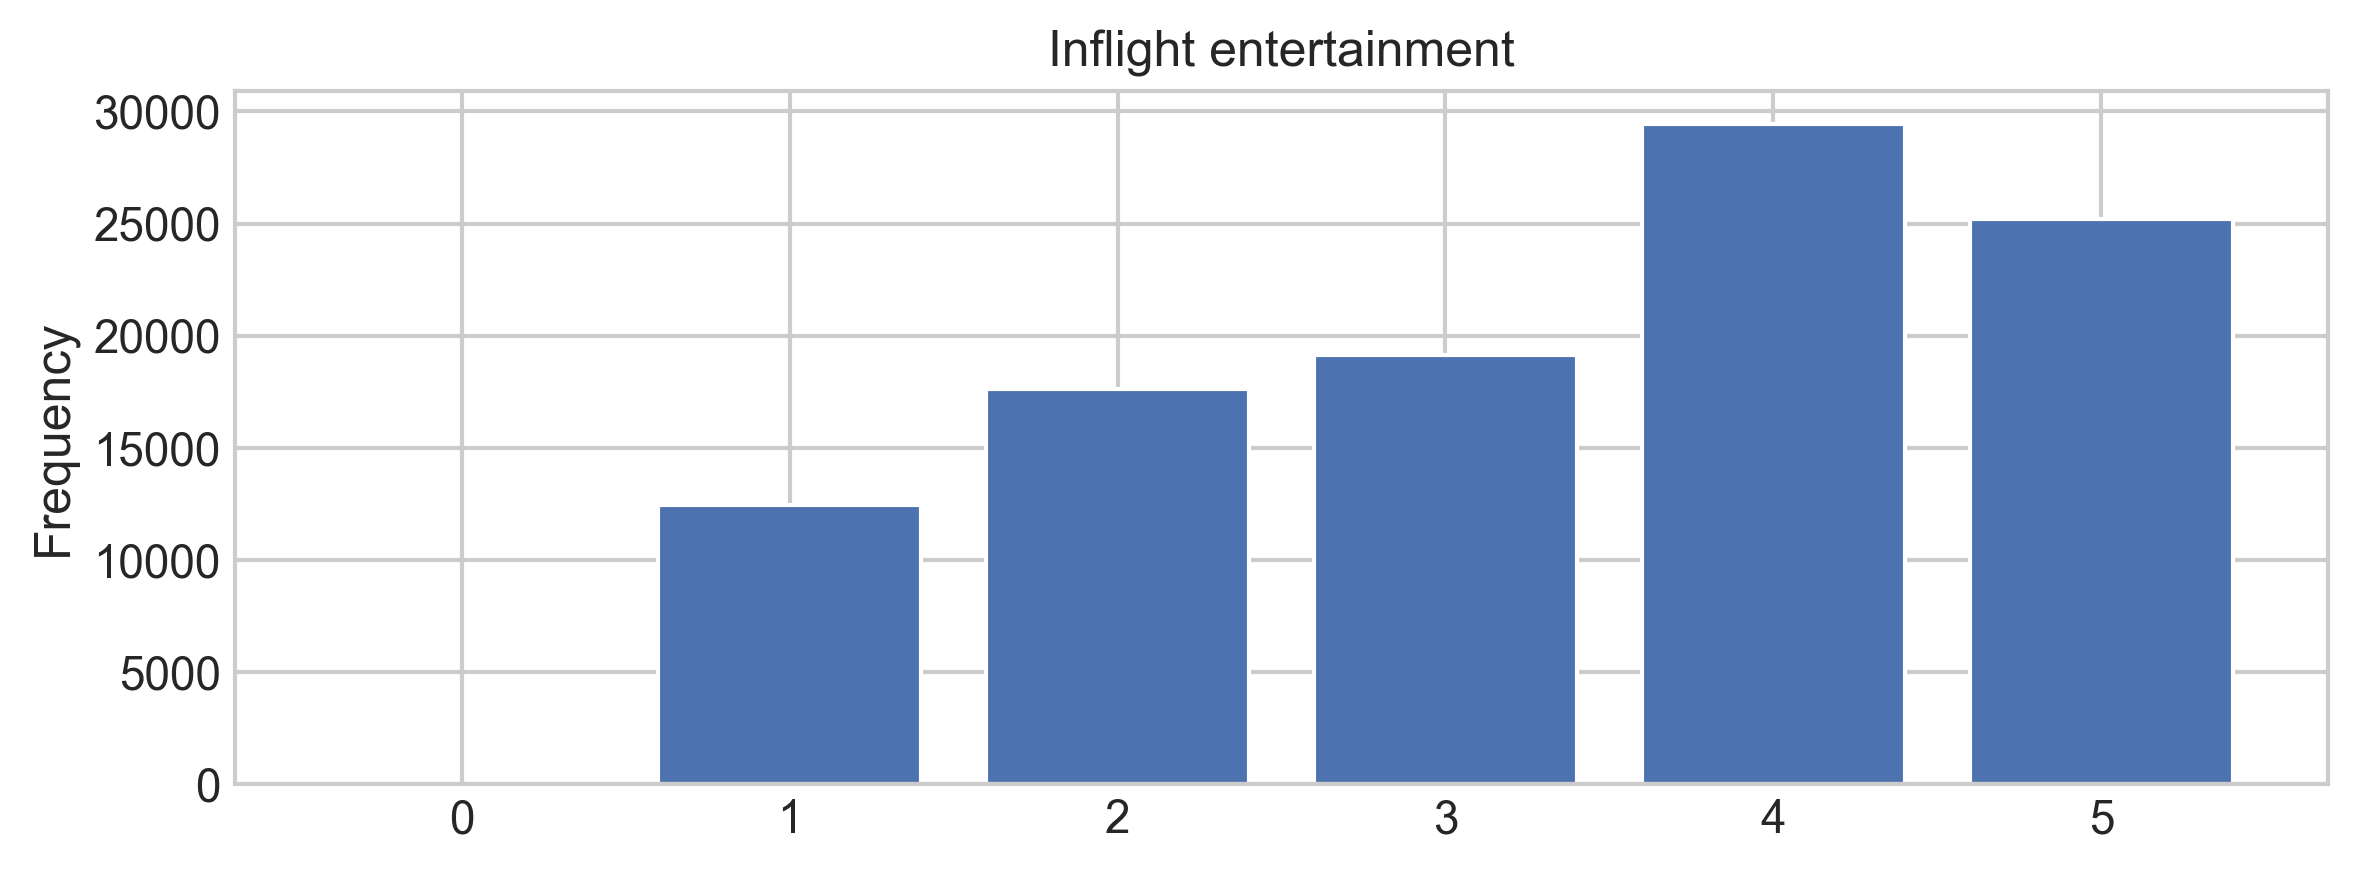

Inflight entertainment: 
 4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: Inflight entertainment, dtype: int64


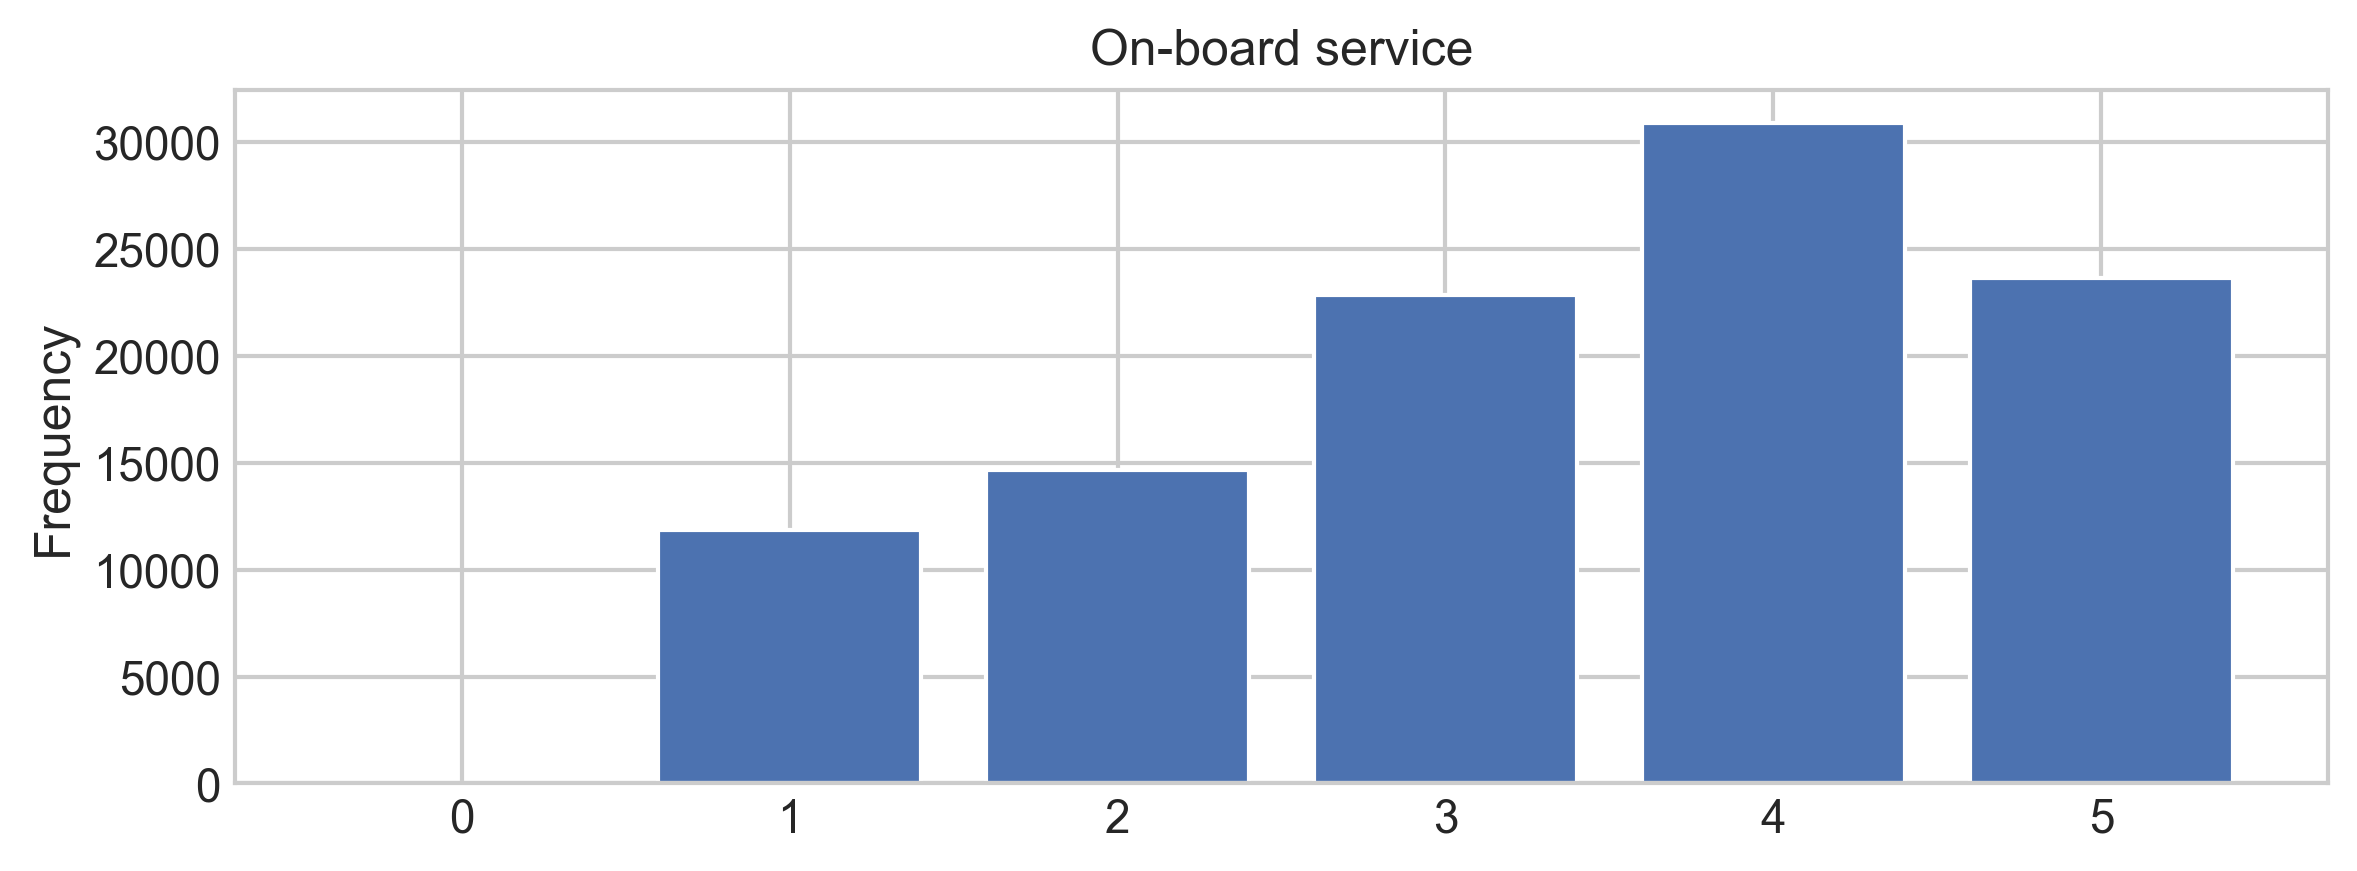

On-board service: 
 4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: On-board service, dtype: int64


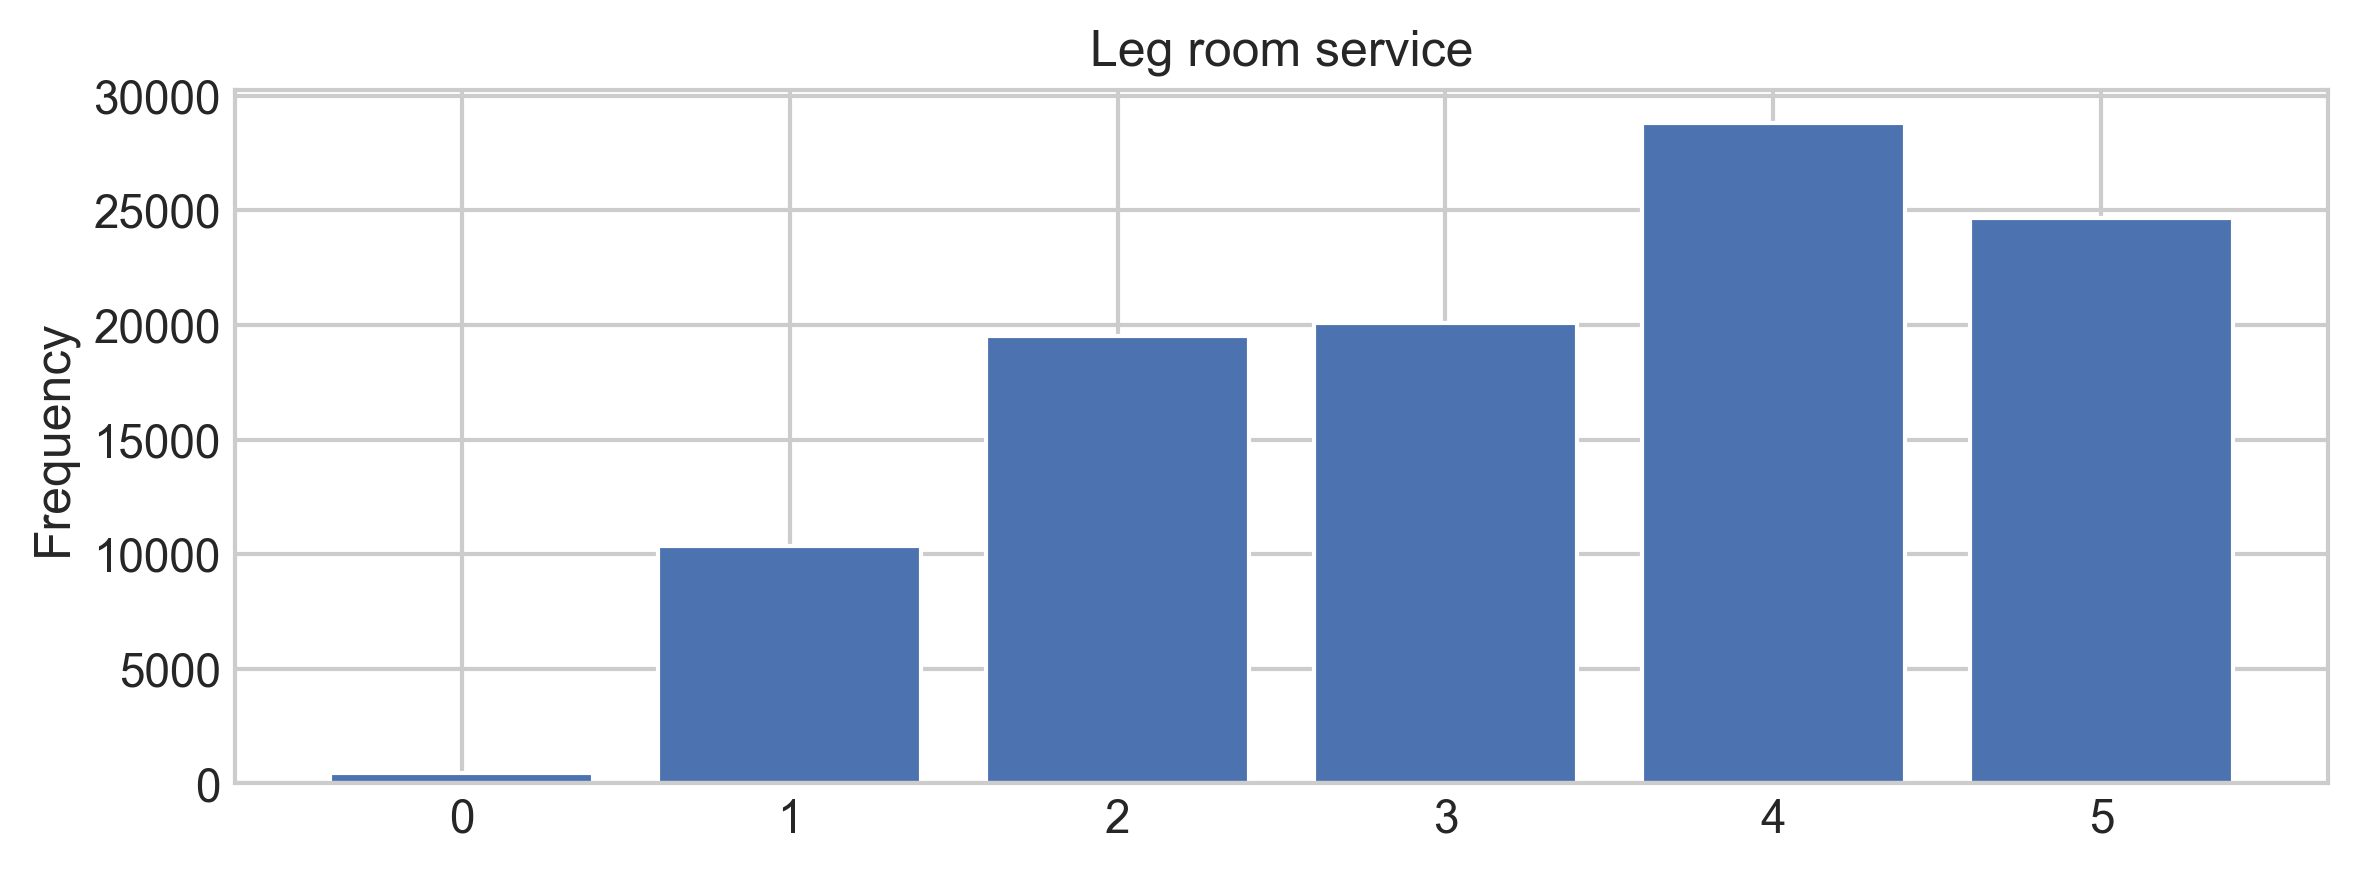

Leg room service: 
 4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: Leg room service, dtype: int64


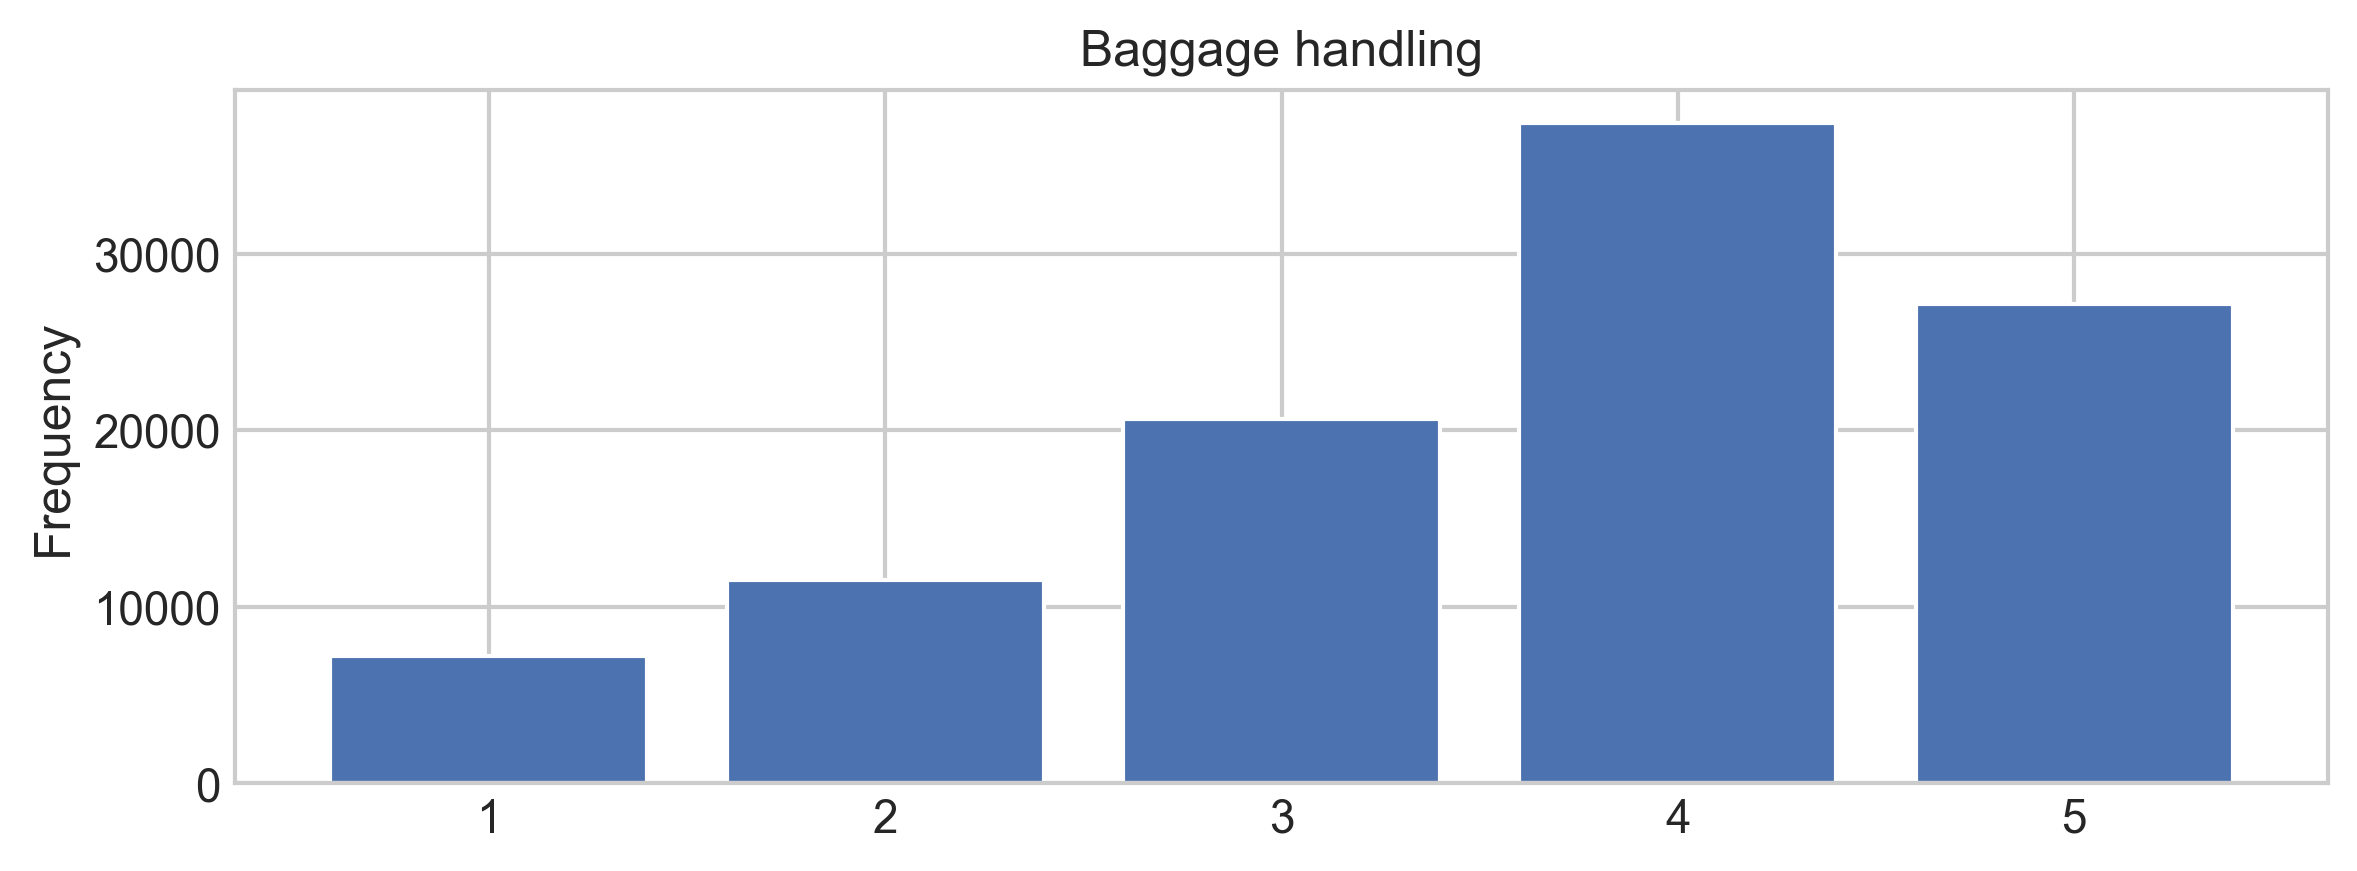

Baggage handling: 
 4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage handling, dtype: int64


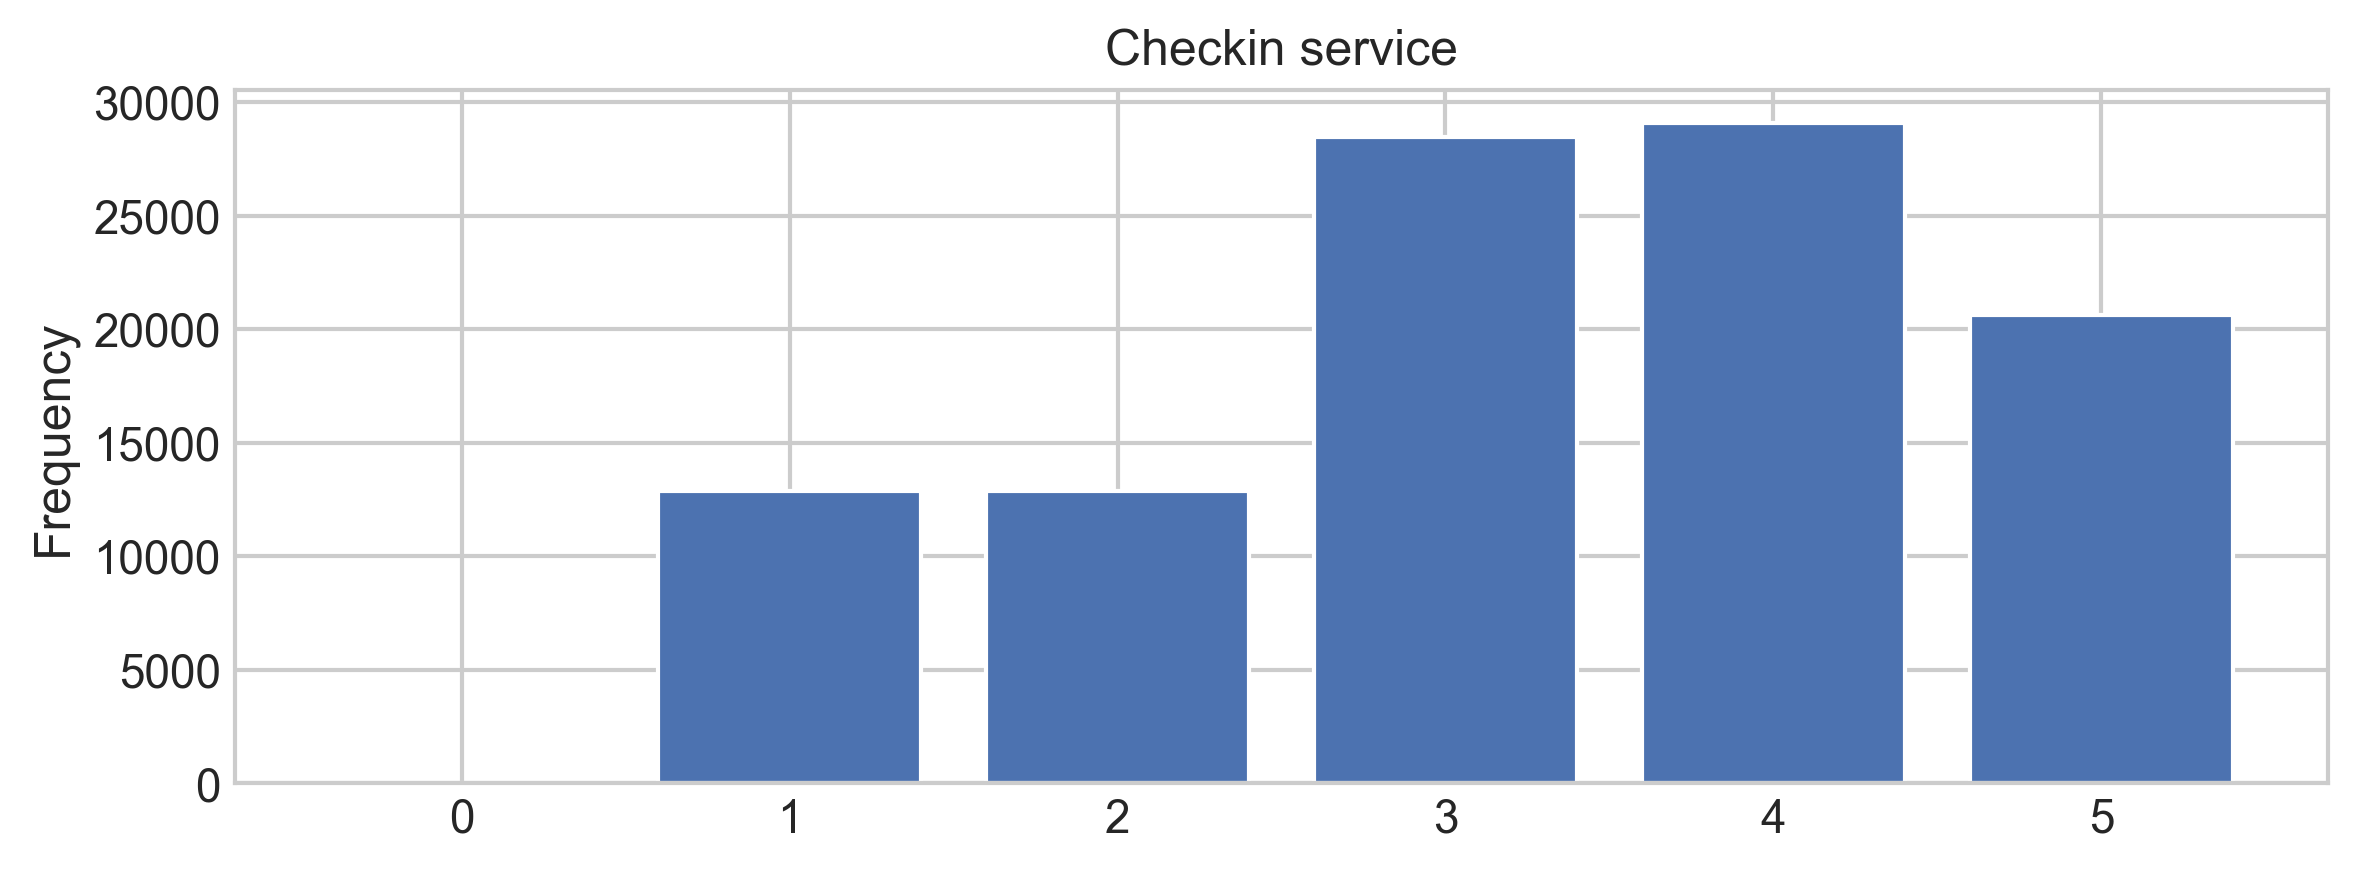

Checkin service: 
 4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64


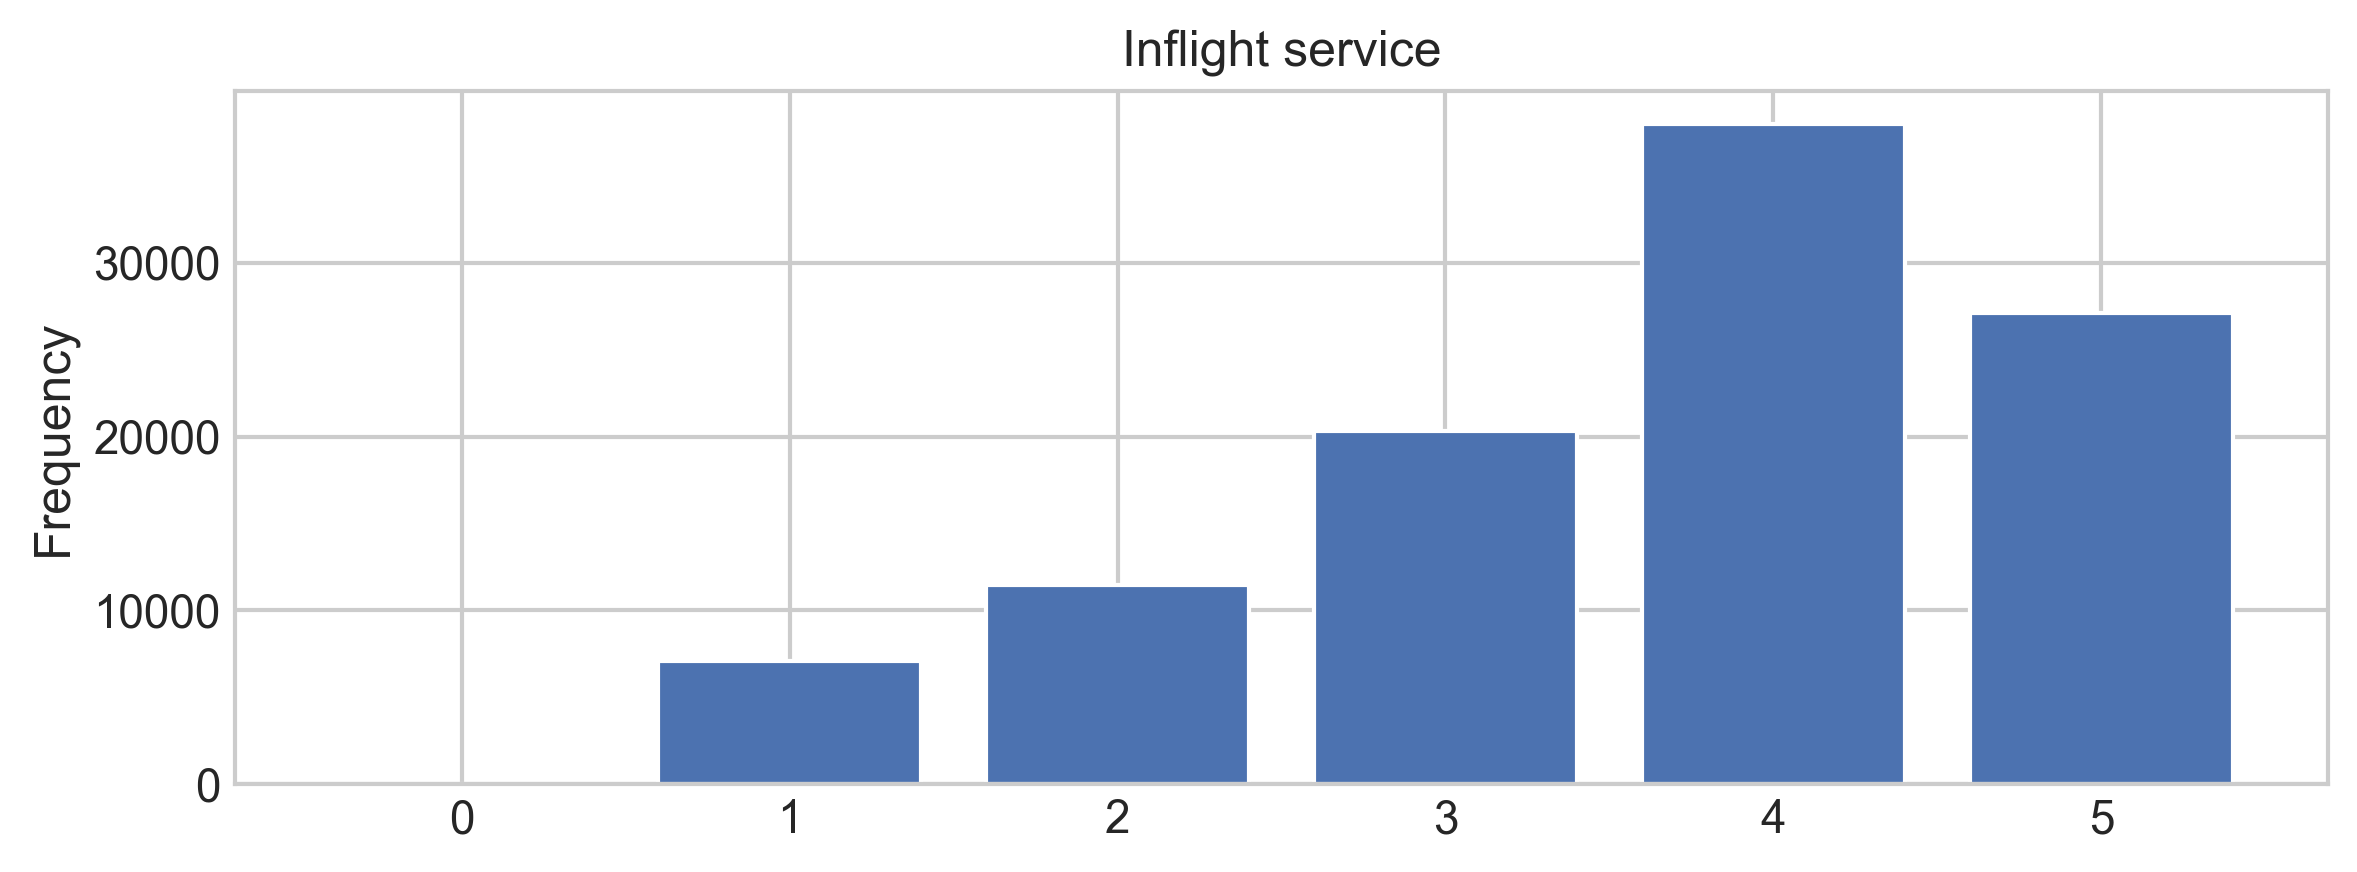

Inflight service: 
 4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64


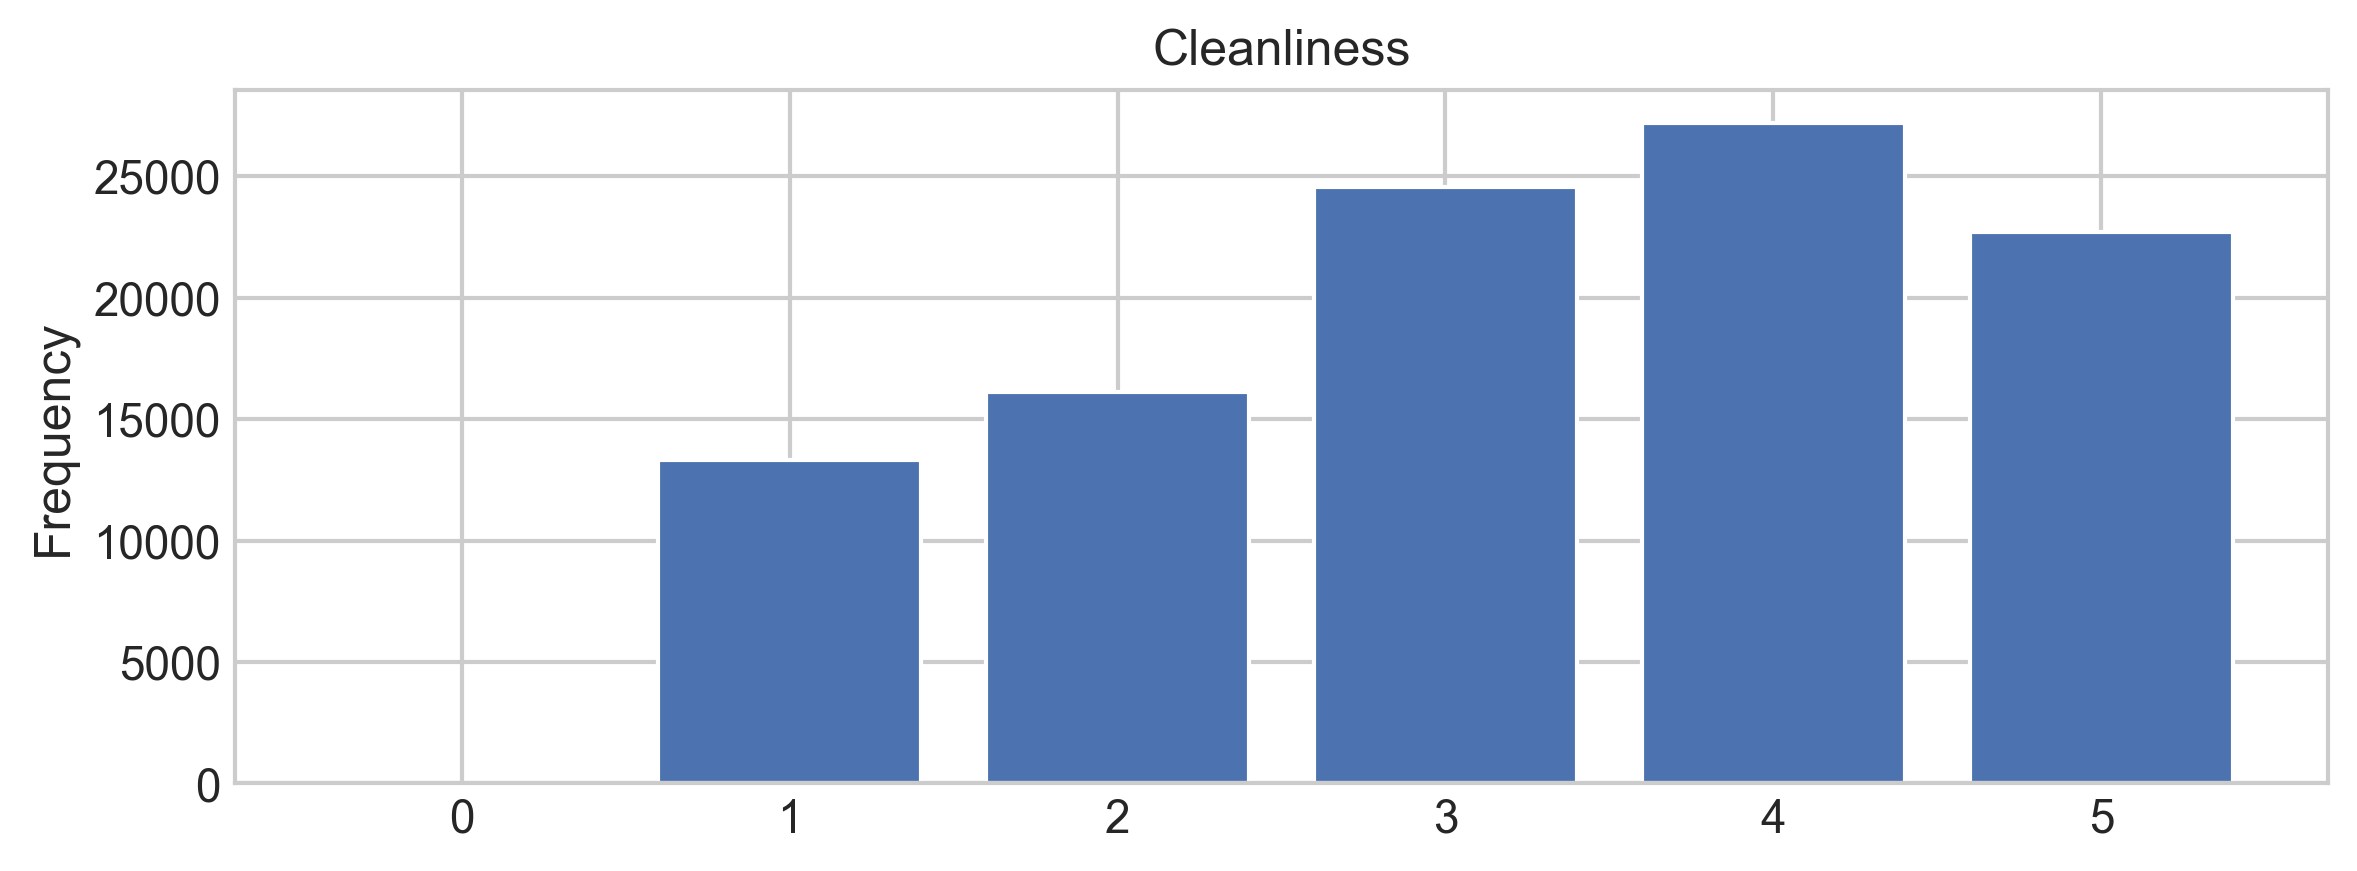

Cleanliness: 
 4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64


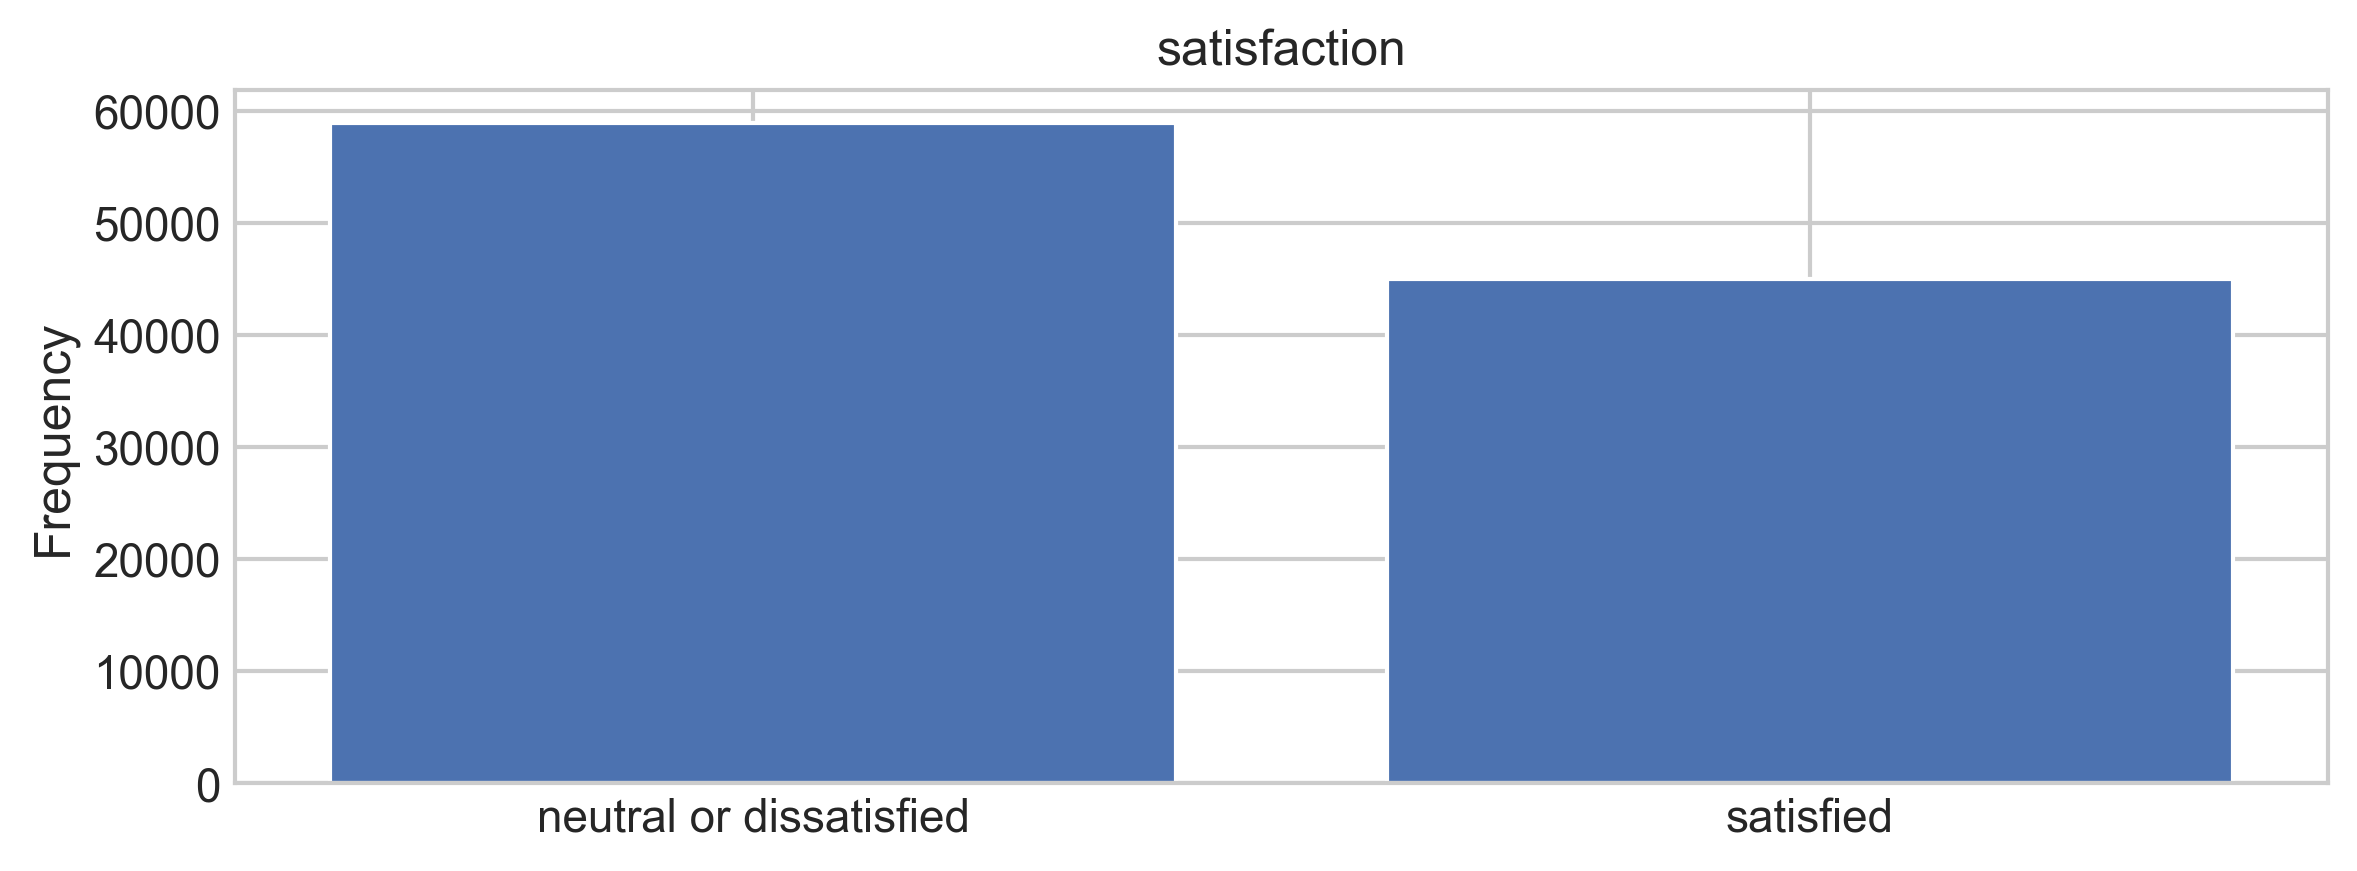

satisfaction: 
 neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


In [27]:
## categorical_var = ["Gender", "Customer_Type", "Type_of_Travel", "Class"]
for each in categorical_df:
    bar_plot(each)

In [30]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

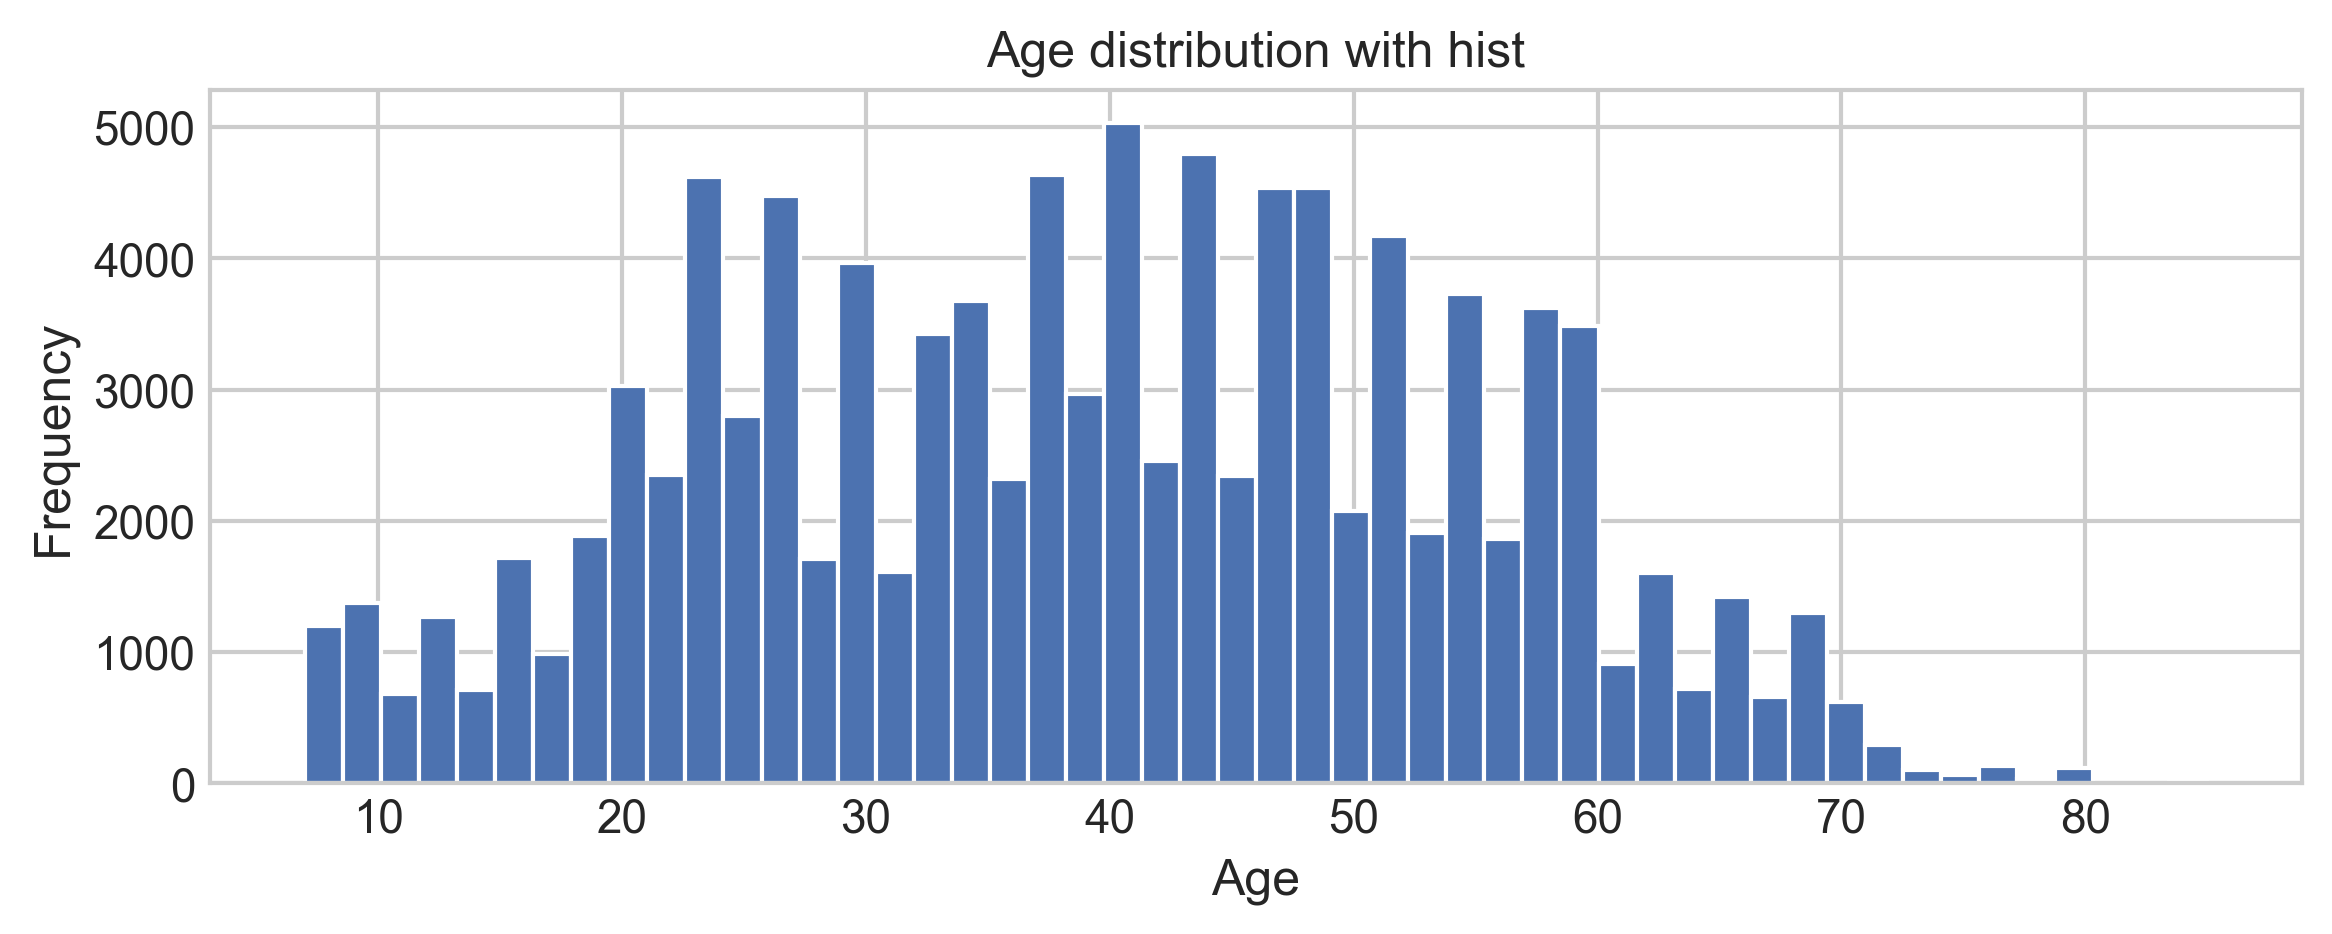

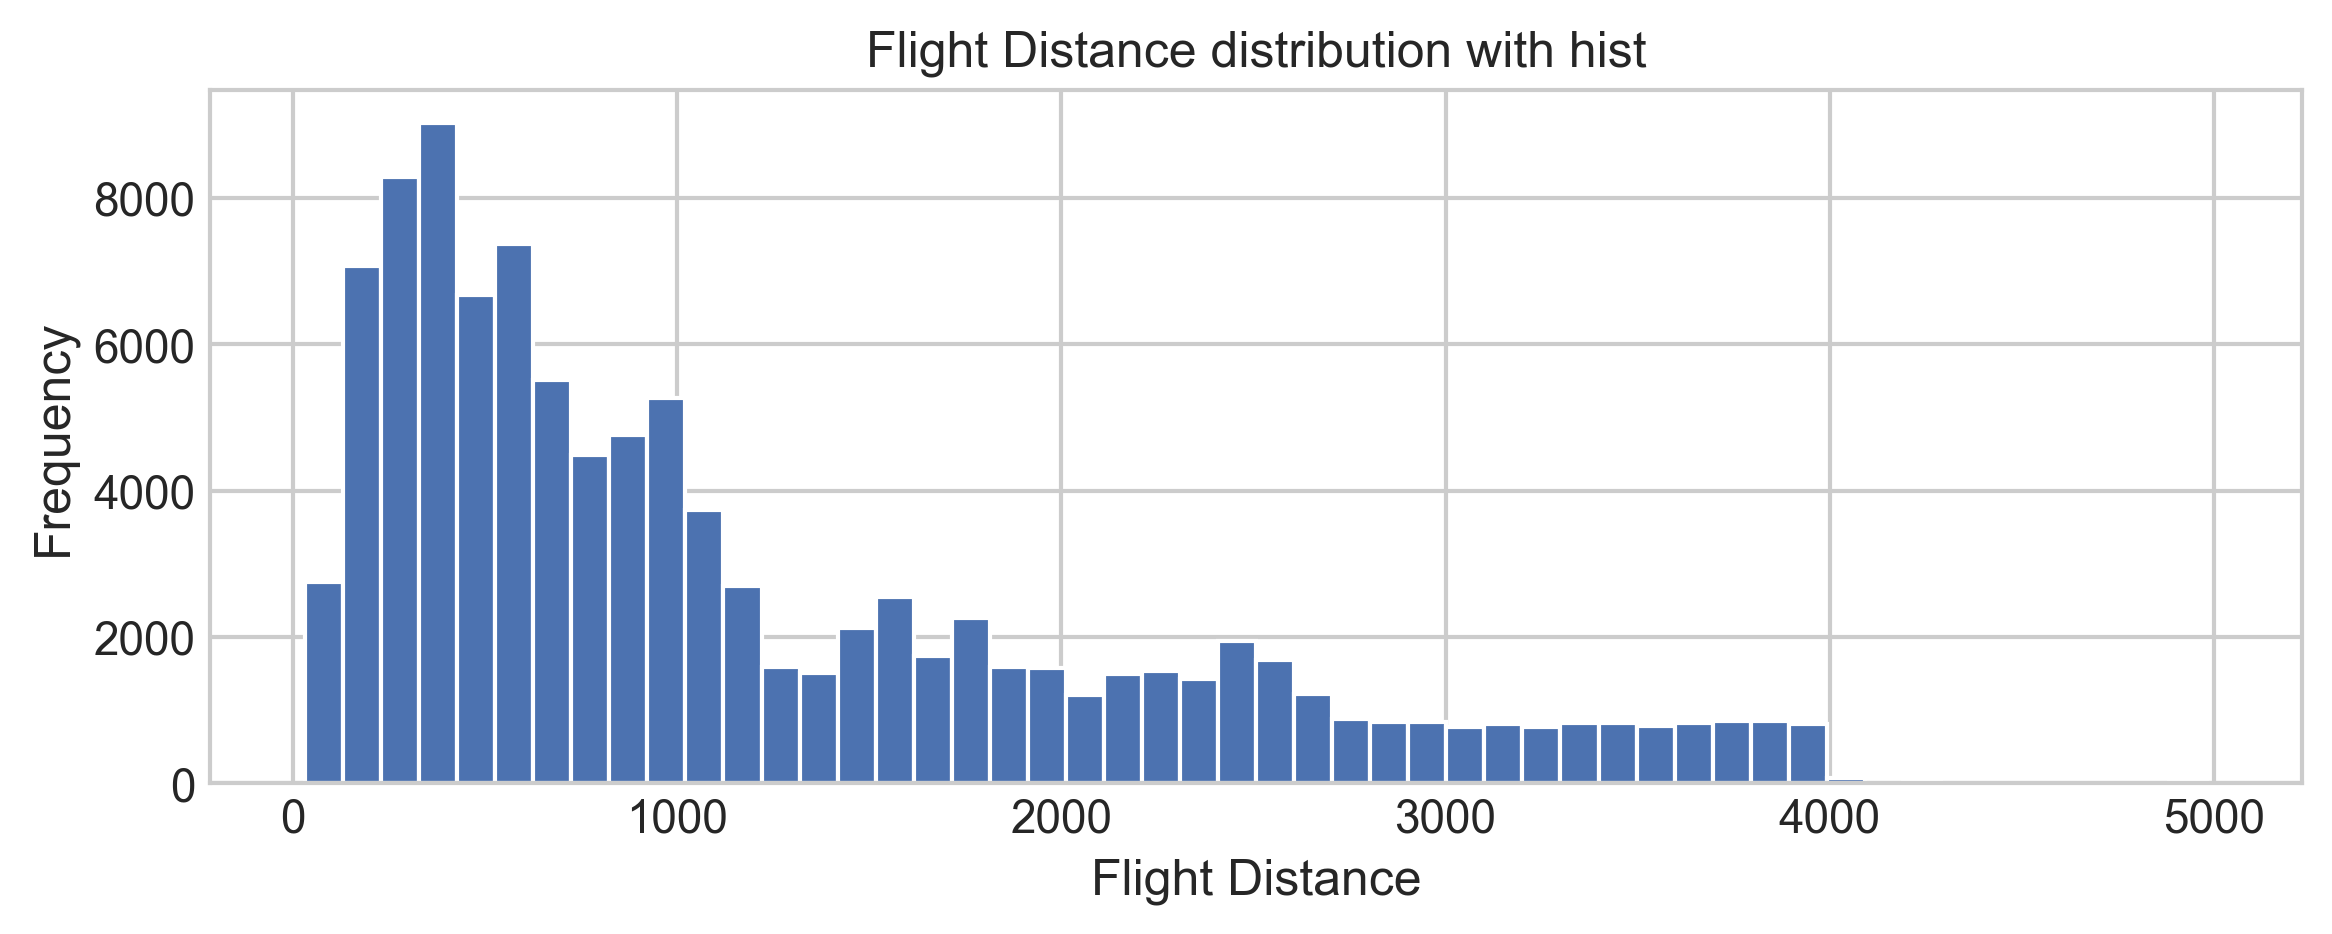

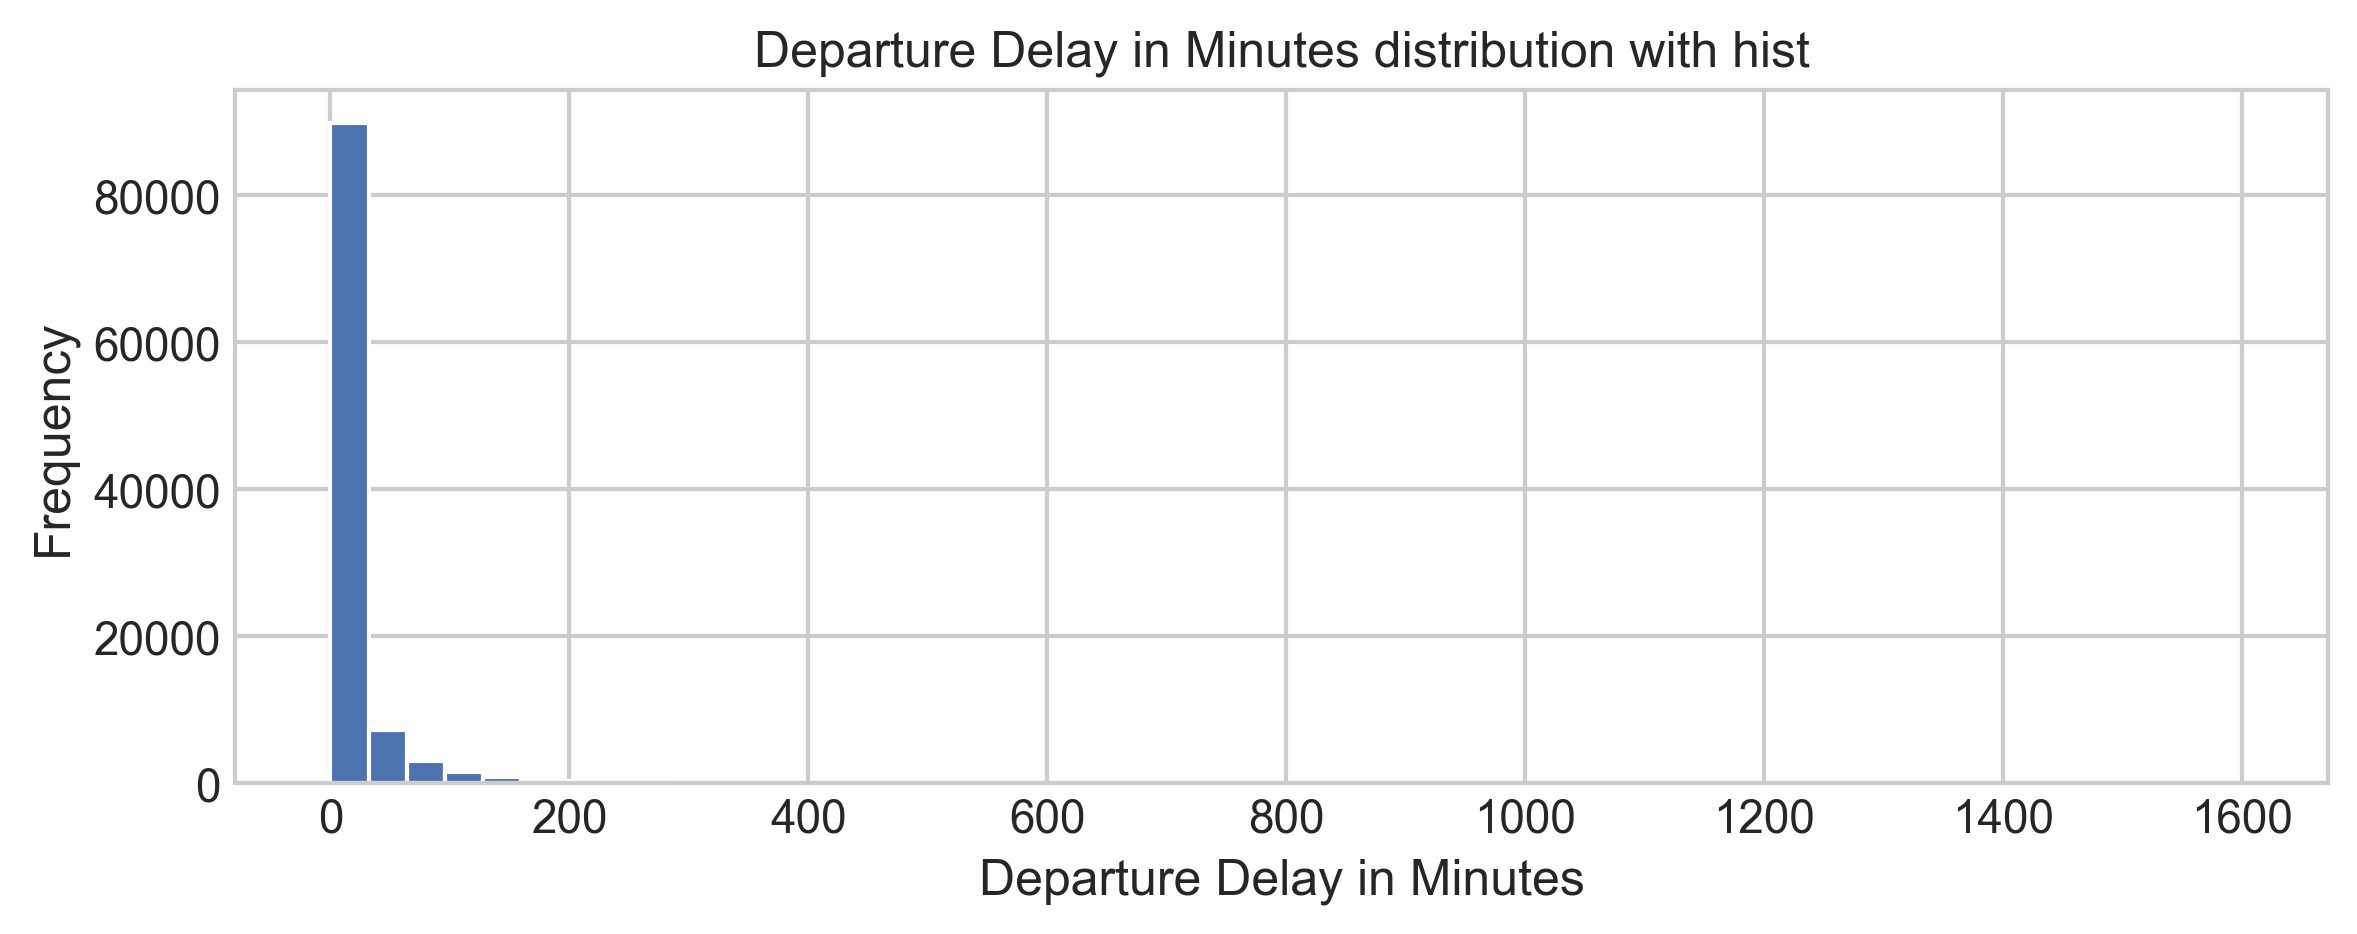

In [31]:
# numerical_var = ["Age", "Flight Distance", "Departure Delay in Minutes"]
for n in numeric_df:
    plot_hist(n)

Text(0.5, 1.0, 'Gender Distribution')

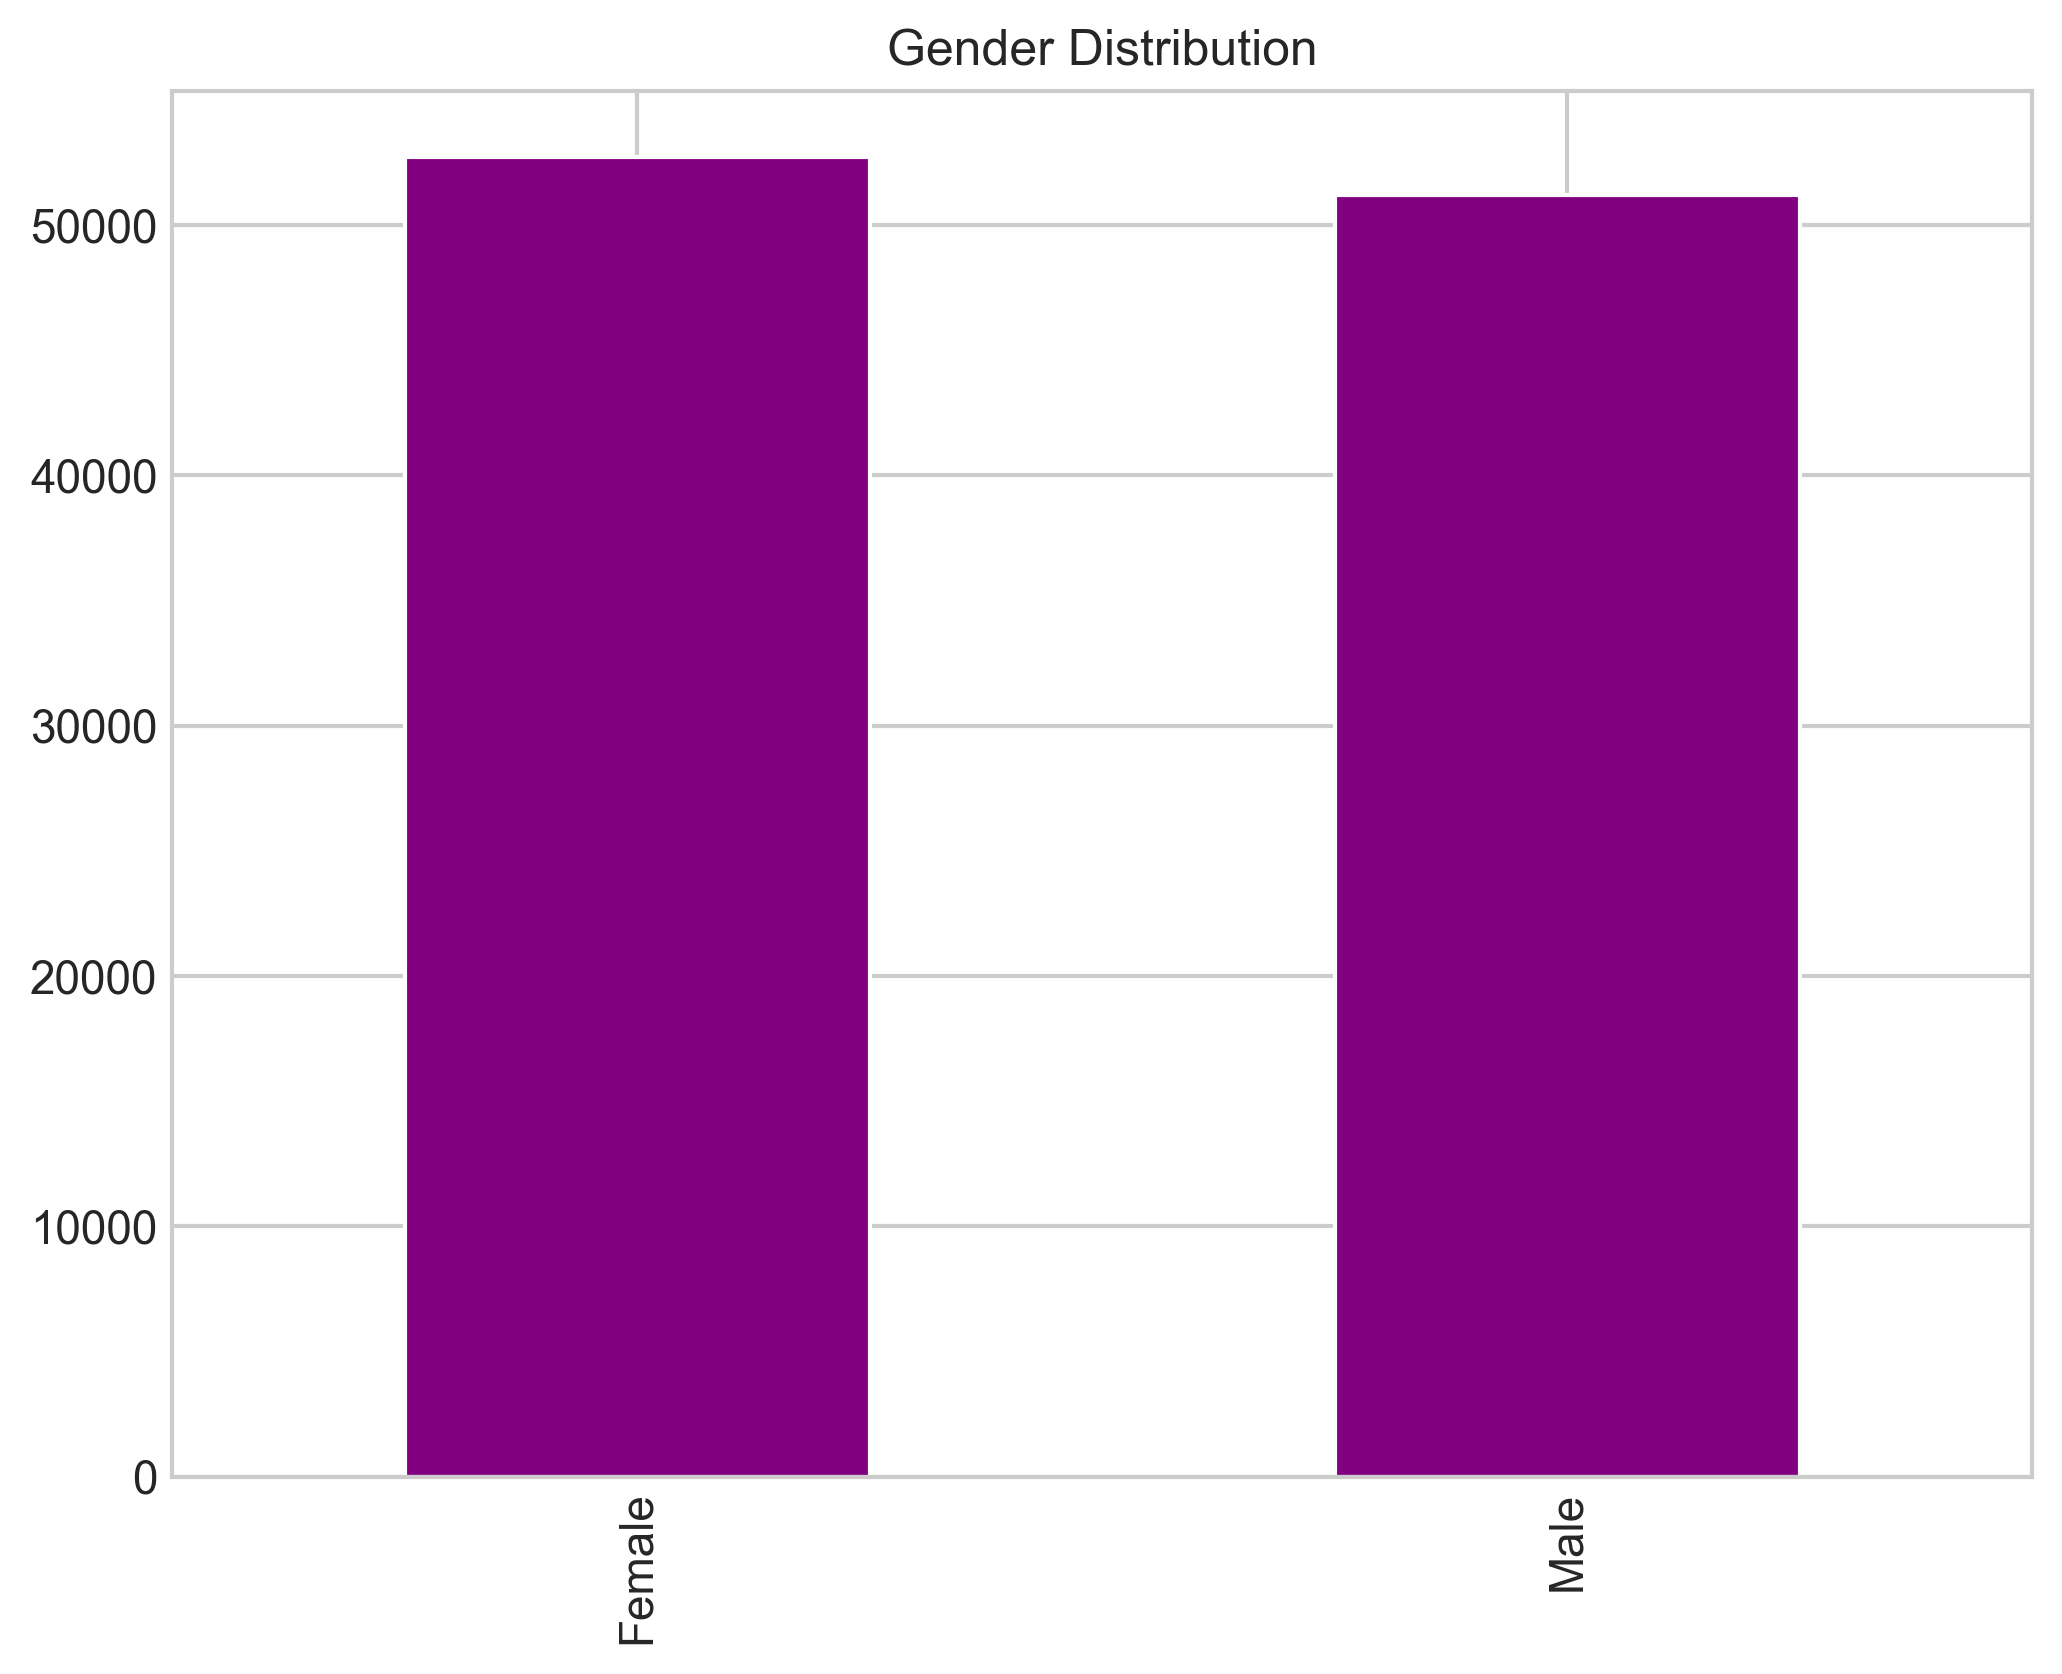

In [74]:
# Bar plot for  column

train_df["Gender"].value_counts().plot(kind="bar", color ="purple")
plt.title("Gender Distribution")

Text(0.5, 1.0, 'People satisfaction rating')

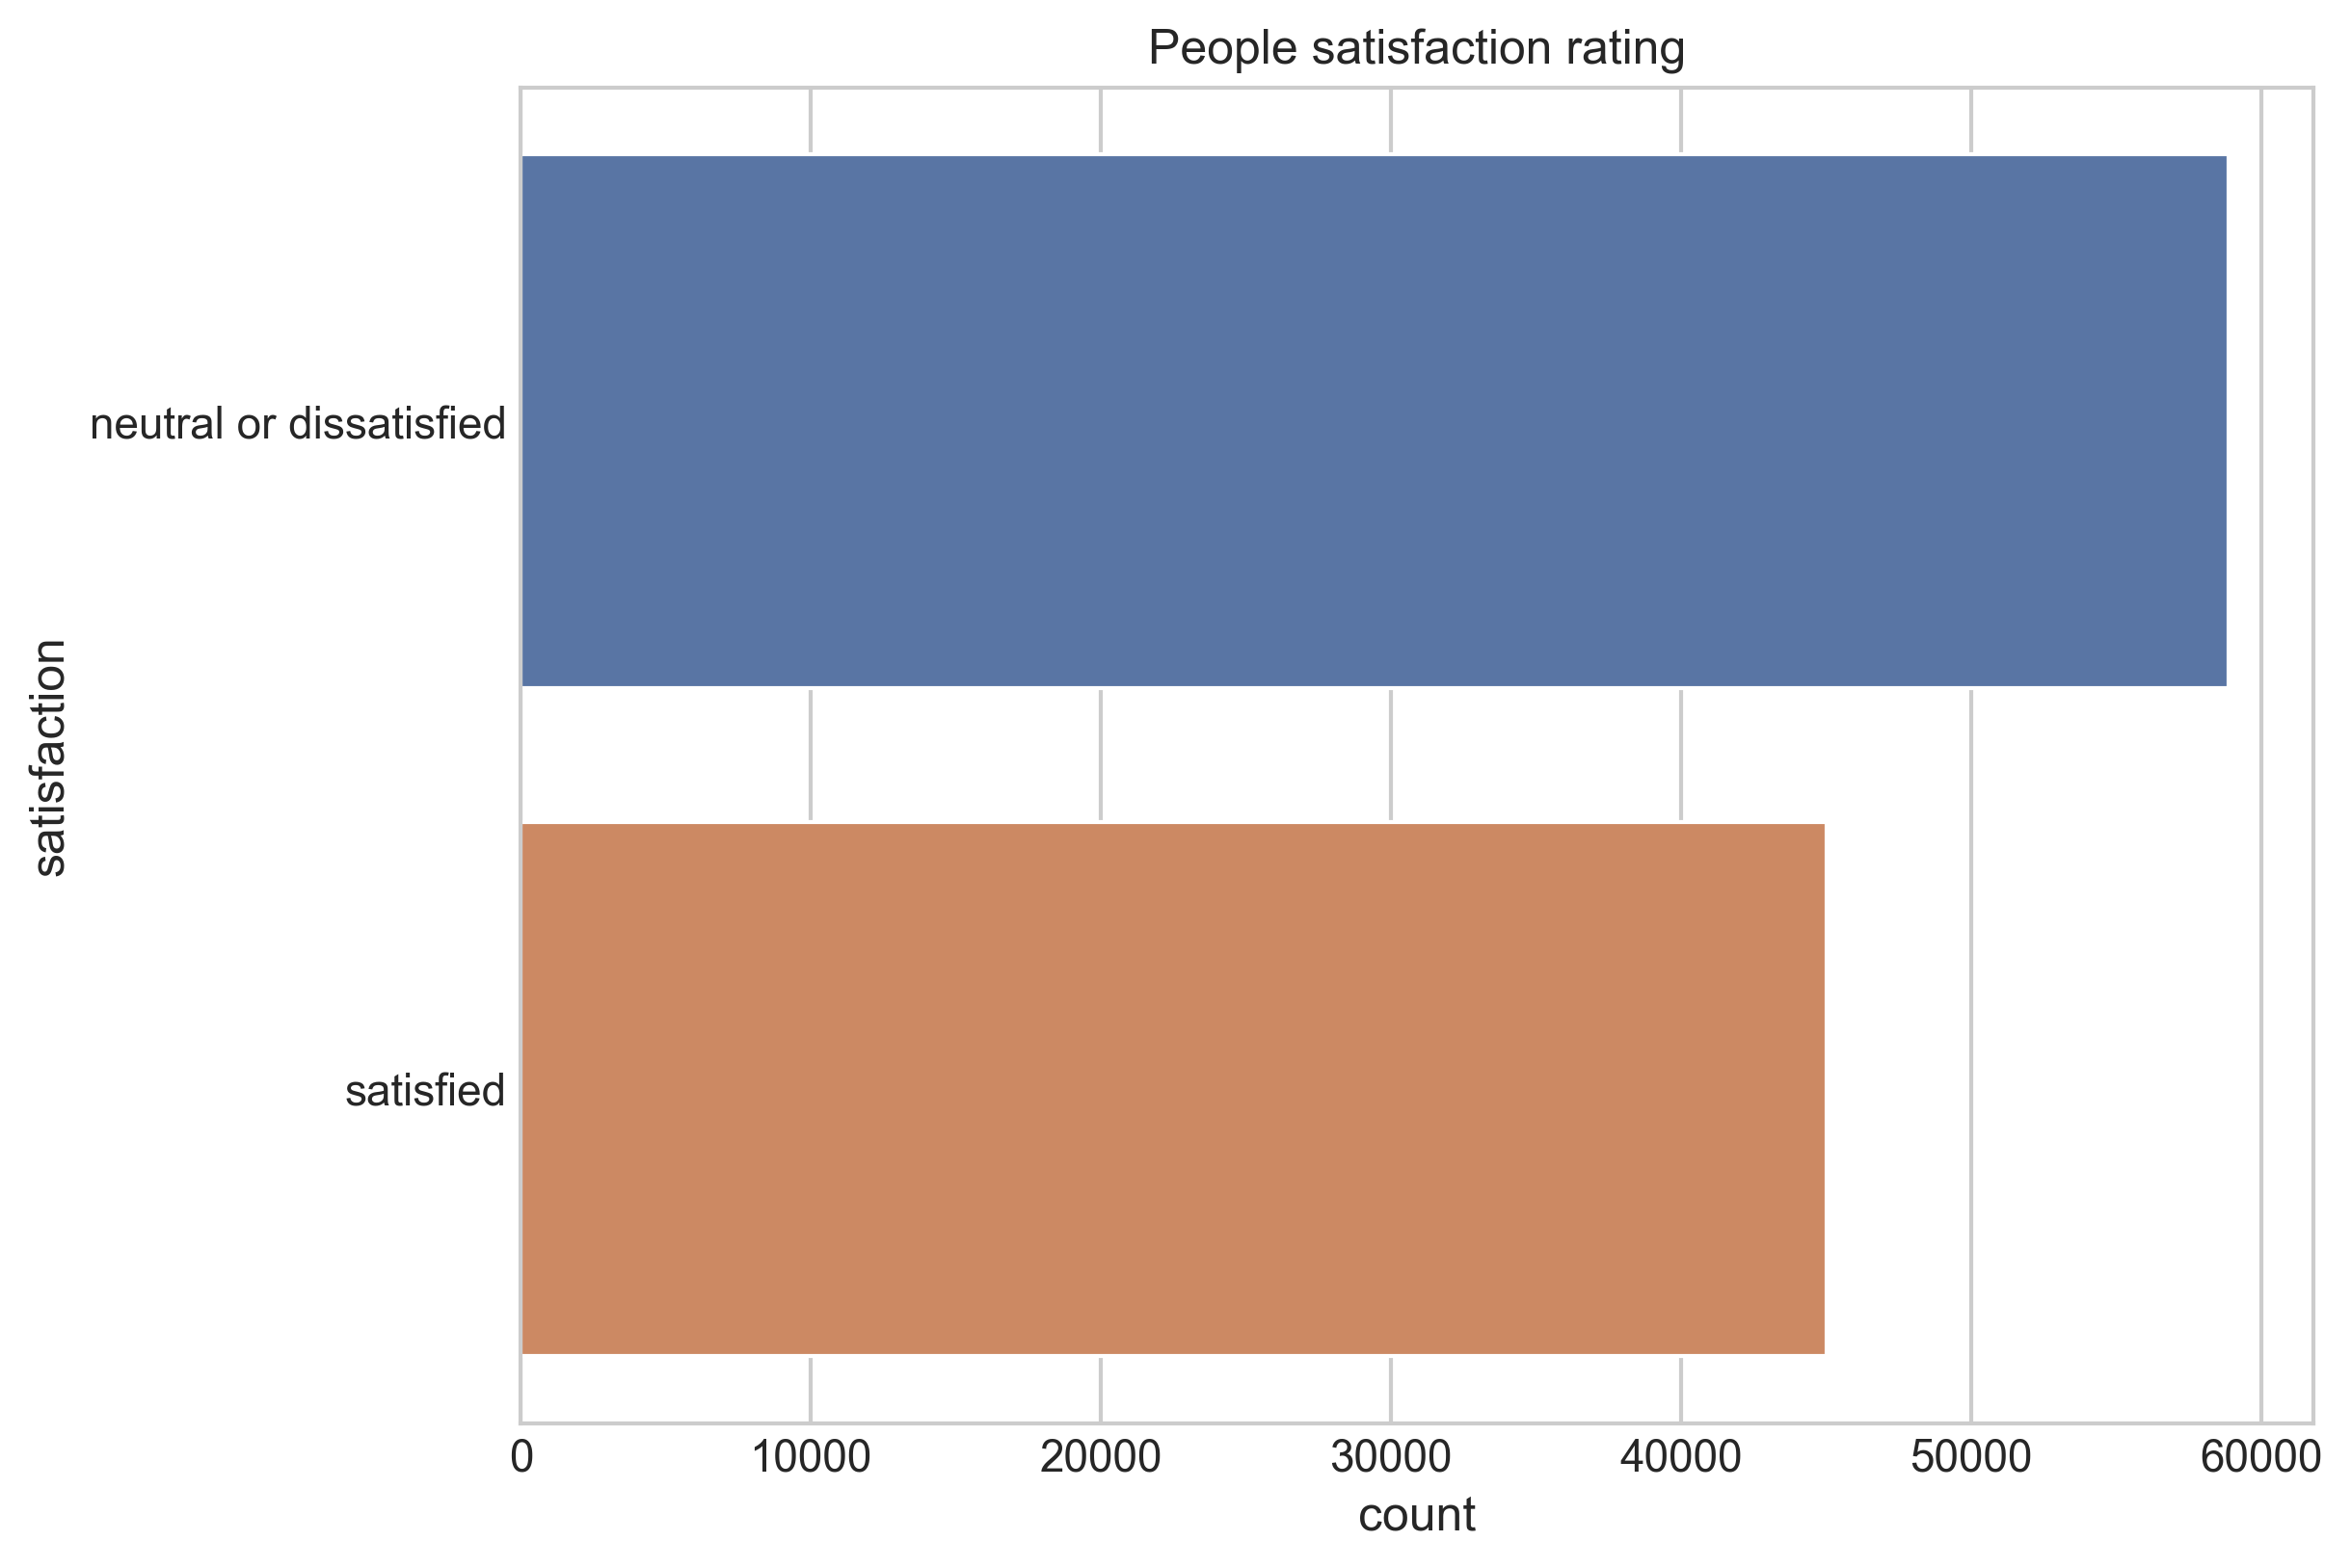

In [32]:
# Bar plot for the satisfaction column with the counting

sns.countplot(y = "satisfaction", data = data)
plt.title("People satisfaction rating")

In [174]:
# train_df['satisfaction'].replace({'neutral or dissatisfied' : 0, 'satisfied' : 1},inplace = True)

In [30]:
# Box plot for satisfaction rate change according to constant customer or not

sns.boxplot(x = "Customer Type", y = "satisfaction", data = data)
plt.title("People habits affects satisfaction?", size=15)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [31]:
data2 = pd.get_dummies(data)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   Age                                   103904 non-null  int64
 1   Flight Distance                       103904 non-null  int64
 2   Inflight wifi service                 103904 non-null  int64
 3   Departure/Arrival time convenient     103904 non-null  int64
 4   Ease of Online booking                103904 non-null  int64
 5   Gate location                         103904 non-null  int64
 6   Food and drink                        103904 non-null  int64
 7   Online boarding                       103904 non-null  int64
 8   Seat comfort                          103904 non-null  int64
 9   Inflight entertainment                103904 non-null  int64
 10  On-board service                      103904 non-null  int64
 11  Leg room service          

In [32]:
# replacing values
data['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)
data['Customer Type'].replace(['Loyal Customer', 'disloyal Customer'], [0, 1], inplace=True)
data['Type of Travel'].replace(['Business travel', 'Personal Travel'], [0, 1], inplace=True)
data['Class'].replace(['Business', 'Eco', 'Eco Plus'], [0, 1, 2], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  int64 
 1   Customer Type                      103904 non-null  int64 
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  int64 
 4   Class                              103904 non-null  int64 
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
 10  Food and drink                     103904 non-null  int64 
 11  Online boarding                    103904 non-null  

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [34]:
# Split-out validation dataset
X = data.drop("satisfaction", axis = 1)
y = data["satisfaction"]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, train_size=0.80, 
                                                                random_state=1, shuffle=True)

In [35]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [36]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.874956 (0.004616)
LDA: 0.871010 (0.003905)
KNN: 0.756866 (0.005169)
CART: 0.945527 (0.001787)
NB: 0.865693 (0.003199)


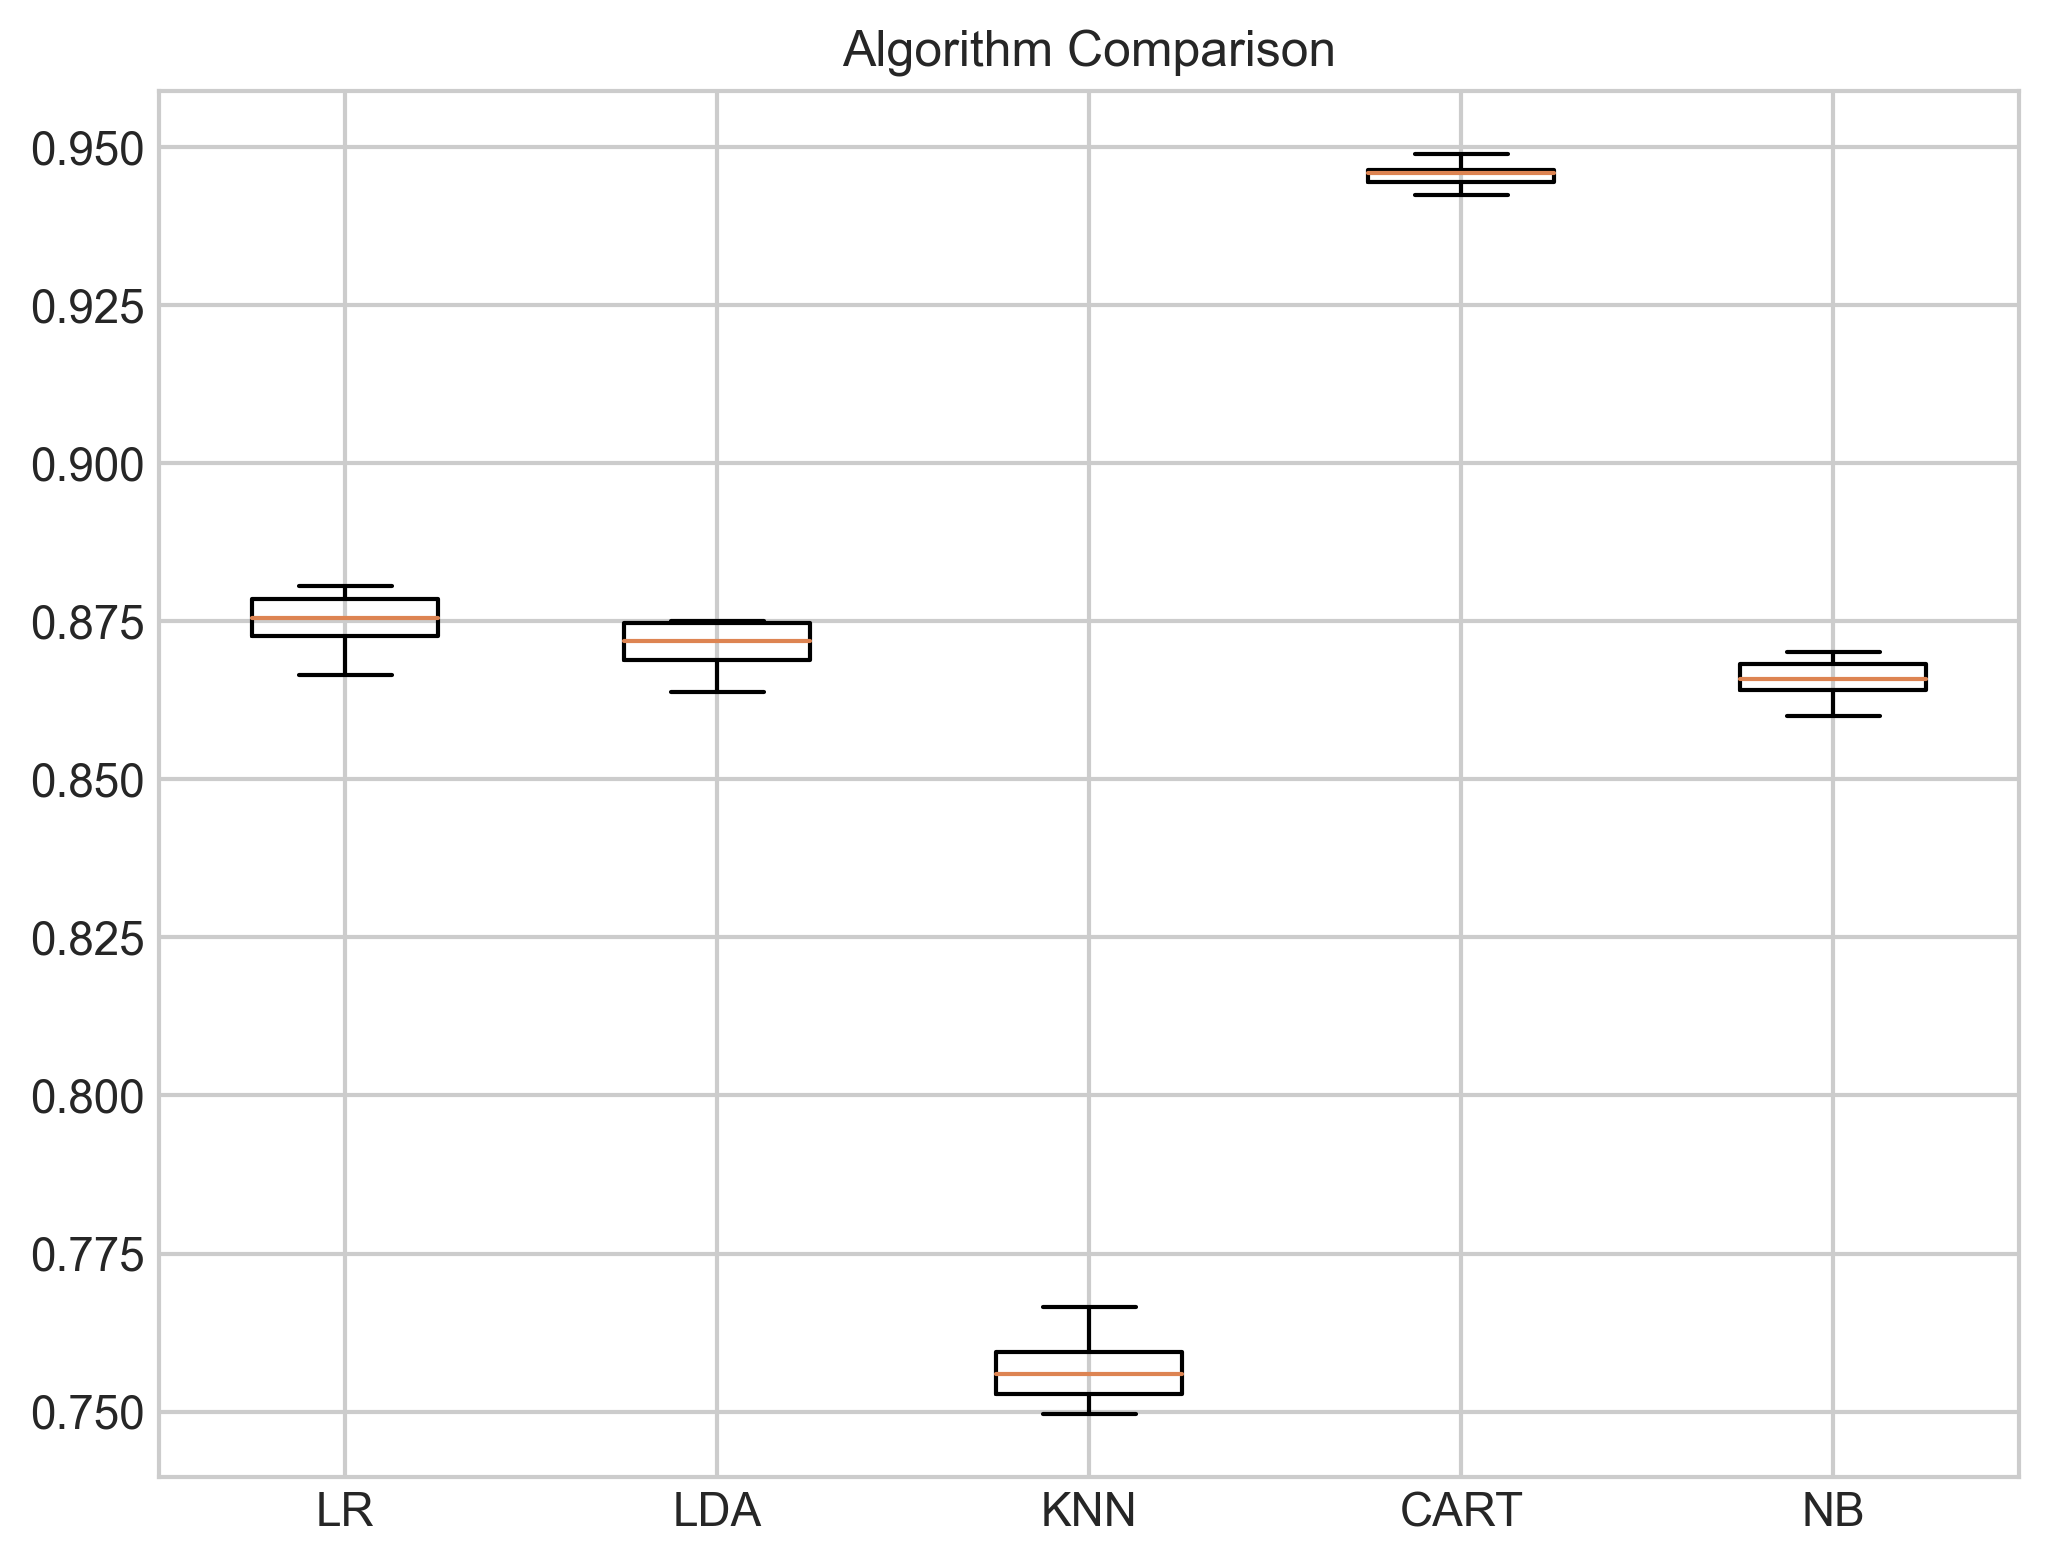

In [42]:
# Compare Algorithms
from matplotlib import pyplot
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print('Accuracy Score(Doğruluk Skoru):')
print(accuracy_score(Y_validation, predictions))
print('***************************************')
print('Confusion Matrix(Hata Matrisi):')
print(confusion_matrix(Y_validation, predictions))
print('***************************************')
print('classification_report(Sınıflandırma Raporu):')
print(classification_report(Y_validation, predictions))

Accuracy Score(Doğruluk Skoru):
0.9443241422453202
***************************************
Confusion Matrix(Hata Matrisi):
[[11254   621]
 [  536  8370]]
***************************************
classification_report(Sınıflandırma Raporu):
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     11875
              satisfied       0.93      0.94      0.94      8906

               accuracy                           0.94     20781
              macro avg       0.94      0.94      0.94     20781
           weighted avg       0.94      0.94      0.94     20781



In [46]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [47]:
y_tahmin = model.predict(X_validation)
print(y_tahmin)

['satisfied' 'neutral or dissatisfied' 'neutral or dissatisfied' ...
 'satisfied' 'neutral or dissatisfied' 'satisfied']


In [48]:
print(np.mean(y_tahmin==Y_validation))

0.9437466916895241
